# Analysis of COVID-19 Disparities in California

**Objective:** This notebook analyzes public health data from the California Health & Human Services (CHHS) portal to investigate disparities in COVID-19 vaccination, case, and death rates across different demographic groups, including age, race/ethnicity, and gender. The findings from this analysis were used to author a published research paper.

In [1]:
# ==============================================================================
# MASTER SCRIPT: California COVID-19 Demographic Disparity Analysis
# ==============================================================================

In [2]:
# --- 1. SETUP: IMPORTS & STYLING ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('seaborn-v0_8-whitegrid')
COLOR_PALETTE = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

## Data Loading and Preprocessing

In this step, I load two primary datasets from the CHHS portal: one containing vaccination data and another containing case and death outcomes. I perform initial cleaning by converting date columns to the proper `datetime` format and replicating specific data slicing and row-dropping steps from the original analysis to ensure fidelity.

In [3]:
# --- 2. DATA LOADING & PREPROCESSING ---
VACCINE_DATA_PATH = 'data/DemographicVaccineData.csv'
OUTCOMES_DATA_PATH = 'data/DemographicCovidDeathData.csv'
vaccine_data_raw = pd.read_csv(VACCINE_DATA_PATH)
outcomes_data_raw = pd.read_csv(OUTCOMES_DATA_PATH)

# Replicate exact cleaning steps from original notebooks
vaccine_df = vaccine_data_raw[0:16411].copy()
vaccine_df['administered_date'] = pd.to_datetime(vaccine_df['administered_date'])
vaccine_df = vaccine_df.sort_values(by="administered_date", ascending=True)

outcomes_df = outcomes_data_raw.drop([10800]).copy()
outcomes_df['report_date'] = pd.to_datetime(outcomes_df['report_date'])
outcomes_df = outcomes_df.sort_values(by="report_date", ascending=True)

## Analysis 1: Age-Based Disparities

The first part of the analysis focuses on age. I explore the cumulative vaccination doses administered to different age groups and then normalize this data against population estimates to compare vaccination rates. Finally, I analyze the distribution of COVID-19 cases and deaths among these same age groups to identify which populations were most at risk.

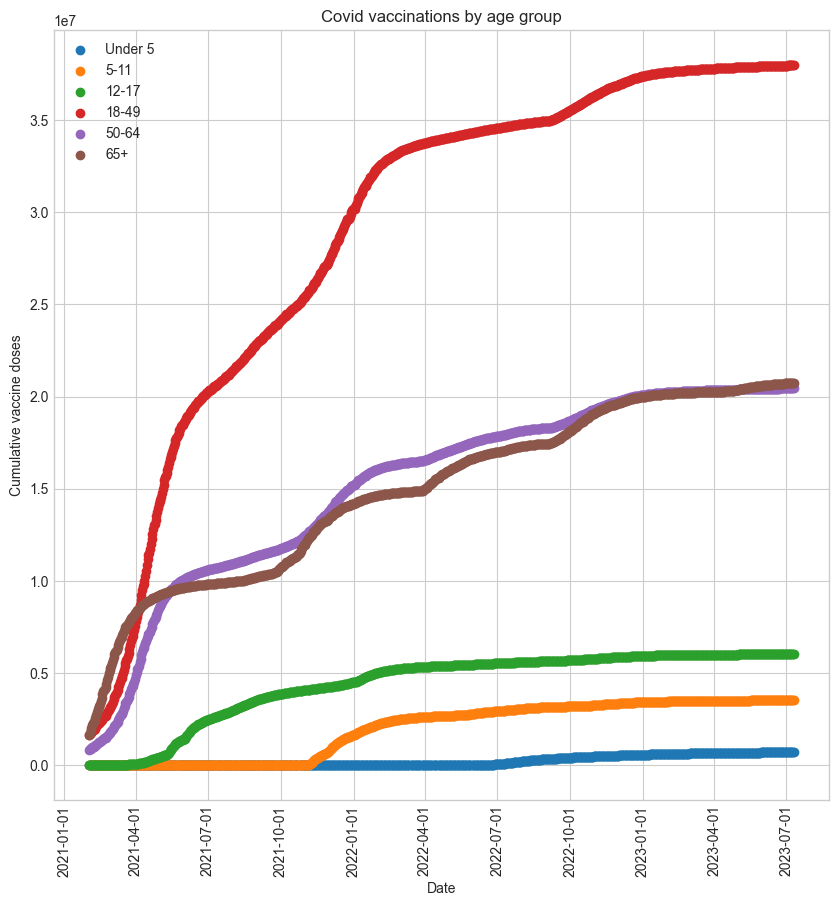

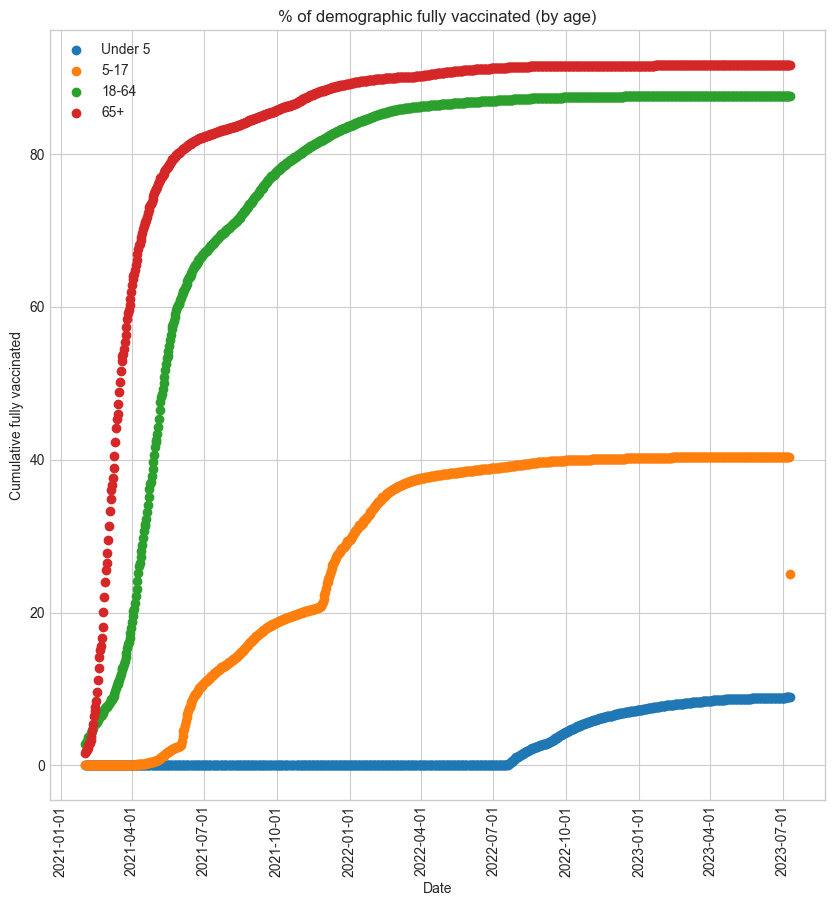

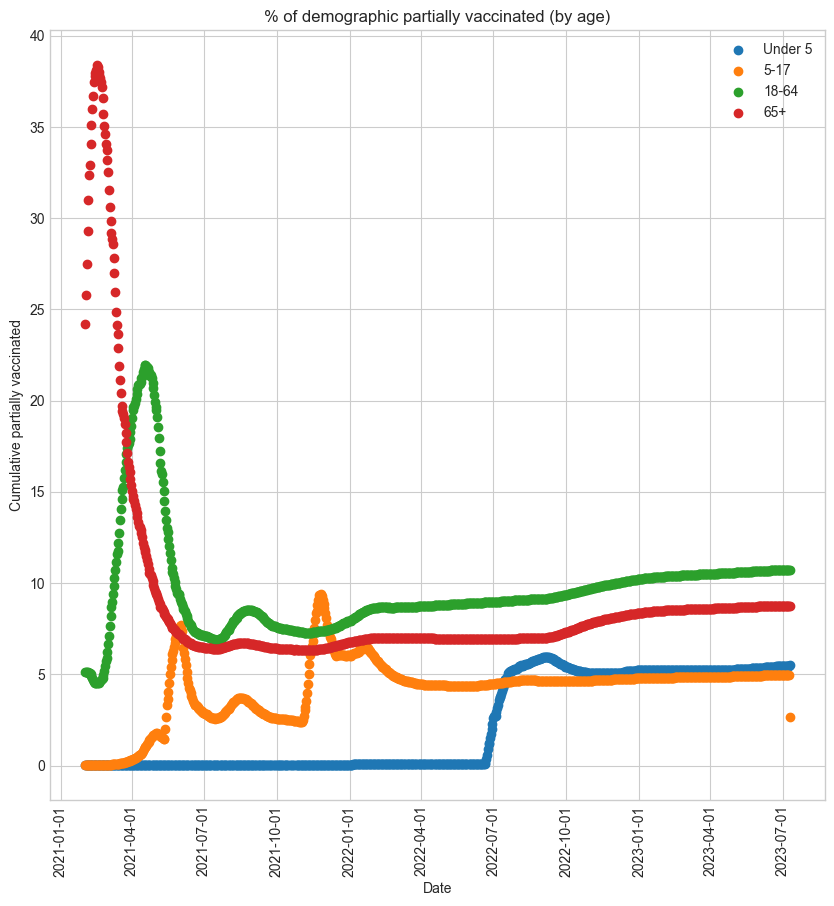

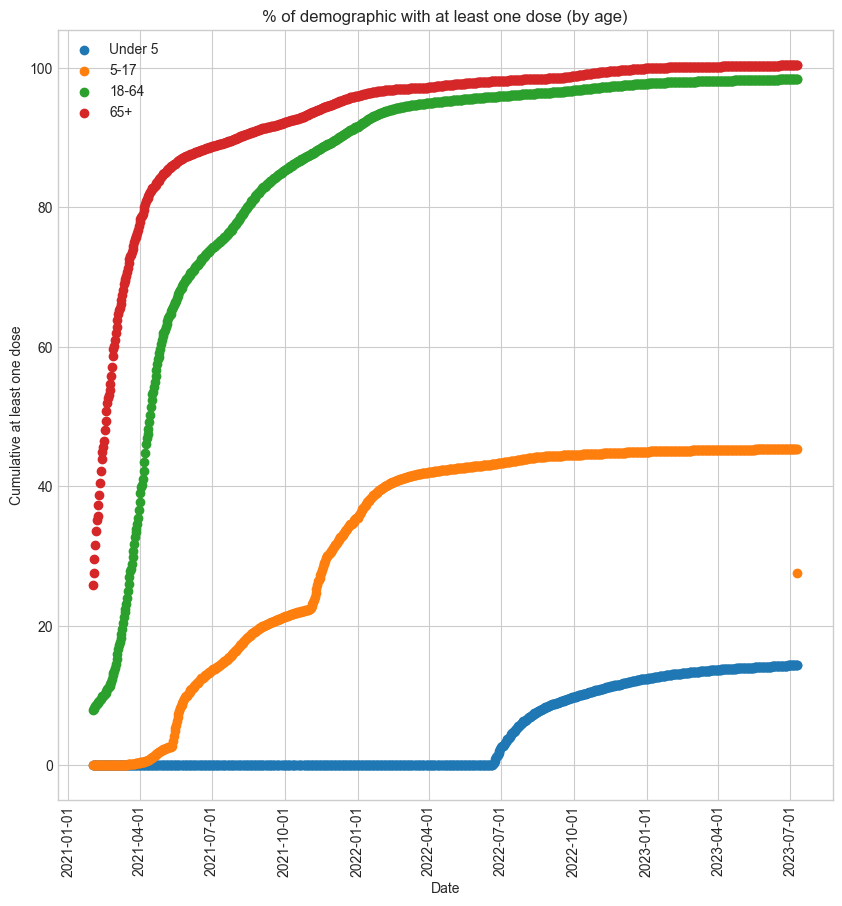

In [4]:
# ==============================================================================
# ANALYSIS 1: VACCINATIONS BY AGE
# ==============================================================================

age_vax_data = vaccine_df[vaccine_df["demographic_category"] == "Age Group"]
age_vax_groups = {group: age_vax_data[age_vax_data["demographic_value"] == group] for group in age_vax_data['demographic_value'].unique()}

# --- Plot 1.1: Cumulative Doses by Age Group ---
fig, ax = plt.subplots(figsize=(10, 10)); ax.set_title("Covid vaccinations by age group"); ax.set_xlabel("Date"); ax.set_ylabel("Cumulative vaccine doses")
age_vax_plot_labels = ["Under 5", "5-11", "12-17", "18-49", "50-64", "65+"]
for i, group in enumerate(age_vax_plot_labels):
    ax.scatter(age_vax_groups[group]["administered_date"], age_vax_groups[group]["cumulative_total_doses"], color=COLOR_PALETTE[i], label=group)
ax.legend(); ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d")); plt.xticks(rotation=90); plt.show()

# --- Manual Calculations for Normalized Age Plots ---
pct_fully_vax_under_5 = age_vax_groups["Under 5"]["cumulative_fully_vaccinated"] / (395382.23 * 0.055)
pct_fully_vax_65_plus = age_vax_groups["65+"]["cumulative_fully_vaccinated"] / (395382.23 * 0.158)
temp_b = age_vax_groups["5-11"]["cumulative_fully_vaccinated"].reset_index(drop=True)
temp_c = age_vax_groups["12-17"]["cumulative_fully_vaccinated"].reset_index(drop=True)
pct_fully_vax_5_17 = []
for i in range(len(temp_b)): pct_fully_vax_5_17.append((temp_b.loc[i] + temp_c.loc[i]) / (395382.23 * 0.218))
pct_fully_vax_5_17.append(temp_c.loc[889] / (395382.23 * 0.218))
temp_d = age_vax_groups["18-49"]["cumulative_fully_vaccinated"].reset_index(drop=True)
temp_e = age_vax_groups["50-64"]["cumulative_fully_vaccinated"].reset_index(drop=True)
pct_fully_vax_18_64 = []
for i in range(len(temp_d)): pct_fully_vax_18_64.append((temp_d.loc[i] + temp_e.loc[i]) / (395382.23 * 0.569))

pct_part_vax_under_5 = age_vax_groups["Under 5"]["total_partially_vaccinated"] / (395382.23 * 0.055)
pct_part_vax_65_plus = age_vax_groups["65+"]["total_partially_vaccinated"] / (395382.23 * 0.158)
temp_b = age_vax_groups["5-11"]["total_partially_vaccinated"].reset_index(drop=True)
temp_c = age_vax_groups["12-17"]["total_partially_vaccinated"].reset_index(drop=True)
pct_part_vax_5_17 = []
for i in range(len(temp_b)): pct_part_vax_5_17.append((temp_b.loc[i] + temp_c.loc[i]) / (395382.23 * 0.218))
pct_part_vax_5_17.append(temp_c.loc[889] / (395382.23 * 0.218))
temp_d = age_vax_groups["18-49"]["total_partially_vaccinated"].reset_index(drop=True)
temp_e = age_vax_groups["50-64"]["total_partially_vaccinated"].reset_index(drop=True)
pct_part_vax_18_64 = []
for i in range(len(temp_d)): pct_part_vax_18_64.append((temp_d.loc[i] + temp_e.loc[i]) / (395382.23 * 0.569))

pct_one_dose_under_5 = age_vax_groups["Under 5"]["cumulative_at_least_one_dose"] / (395382.23 * 0.055)
pct_one_dose_65_plus = age_vax_groups["65+"]["cumulative_at_least_one_dose"] / (395382.23 * 0.158)
temp_b = age_vax_groups["5-11"]["cumulative_at_least_one_dose"].reset_index(drop=True)
temp_c = age_vax_groups["12-17"]["cumulative_at_least_one_dose"].reset_index(drop=True)
pct_one_dose_5_17 = []
for i in range(len(temp_b)): pct_one_dose_5_17.append((temp_b.loc[i] + temp_c.loc[i]) / (395382.23 * 0.218))
pct_one_dose_5_17.append(temp_c.loc[889] / (395382.23 * 0.218))
temp_d = age_vax_groups["18-49"]["cumulative_at_least_one_dose"].reset_index(drop=True)
temp_e = age_vax_groups["50-64"]["cumulative_at_least_one_dose"].reset_index(drop=True)
pct_one_dose_18_64 = []
for i in range(len(temp_d)): pct_one_dose_18_64.append((temp_d.loc[i] + temp_e.loc[i]) / (395382.23 * 0.569))

# --- Plots 1.2-1.4: Consolidated loop for normalized plots ---
plot_configs_age_vax = [
    (pct_fully_vax_under_5, pct_fully_vax_5_17, pct_fully_vax_18_64, pct_fully_vax_65_plus, "% of demographic fully vaccinated (by age)", "Cumulative fully vaccinated"),
    (pct_part_vax_under_5, pct_part_vax_5_17, pct_part_vax_18_64, pct_part_vax_65_plus, "% of demographic partially vaccinated (by age)", "Cumulative partially vaccinated"),
    (pct_one_dose_under_5, pct_one_dose_5_17, pct_one_dose_18_64, pct_one_dose_65_plus, "% of demographic with at least one dose (by age)", "Cumulative at least one dose")
]
for under_5, g5_17, g18_64, g65_plus, title, ylabel in plot_configs_age_vax:
    fig, ax = plt.subplots(figsize=(10, 10)); ax.set_title(title); ax.set_xlabel("Date"); ax.set_ylabel(ylabel)
    ax.scatter(age_vax_groups["Under 5"]["administered_date"], under_5, color=COLOR_PALETTE[0], label="Under 5")
    ax.scatter(age_vax_groups["12-17"]["administered_date"], g5_17, color=COLOR_PALETTE[1], label="5-17")
    ax.scatter(age_vax_groups["18-49"]["administered_date"], g18_64, color=COLOR_PALETTE[2], label="18-64")
    ax.scatter(age_vax_groups["65+"]["administered_date"], g65_plus, color=COLOR_PALETTE[3], label="65+")
    ax.legend(); ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d")); plt.xticks(rotation=90); plt.show()

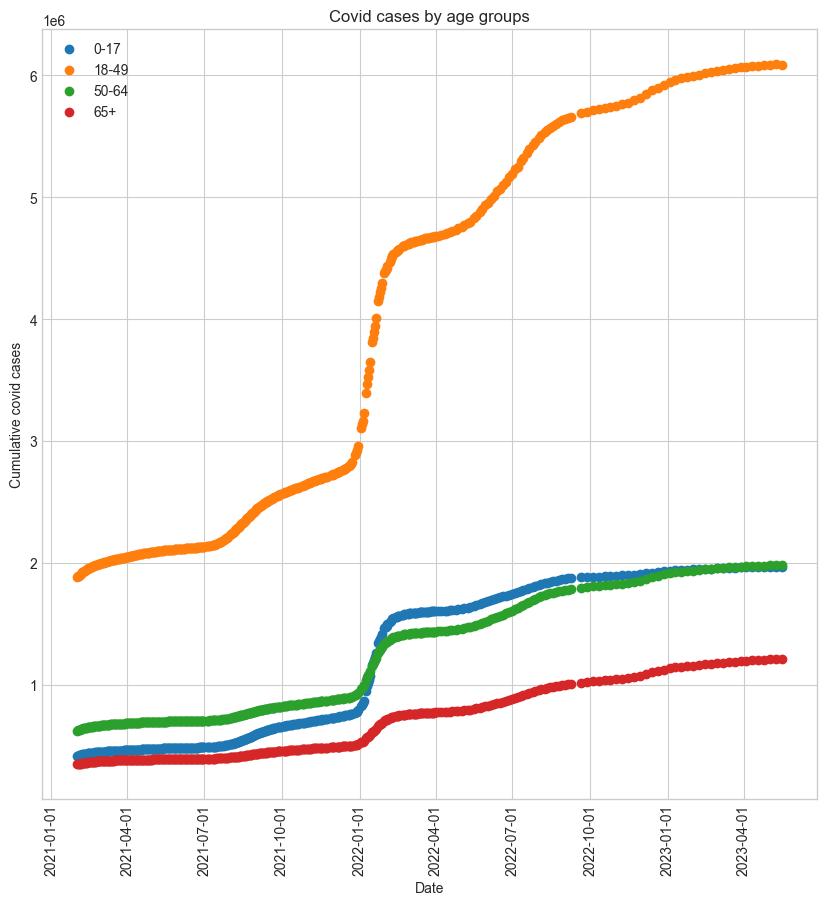

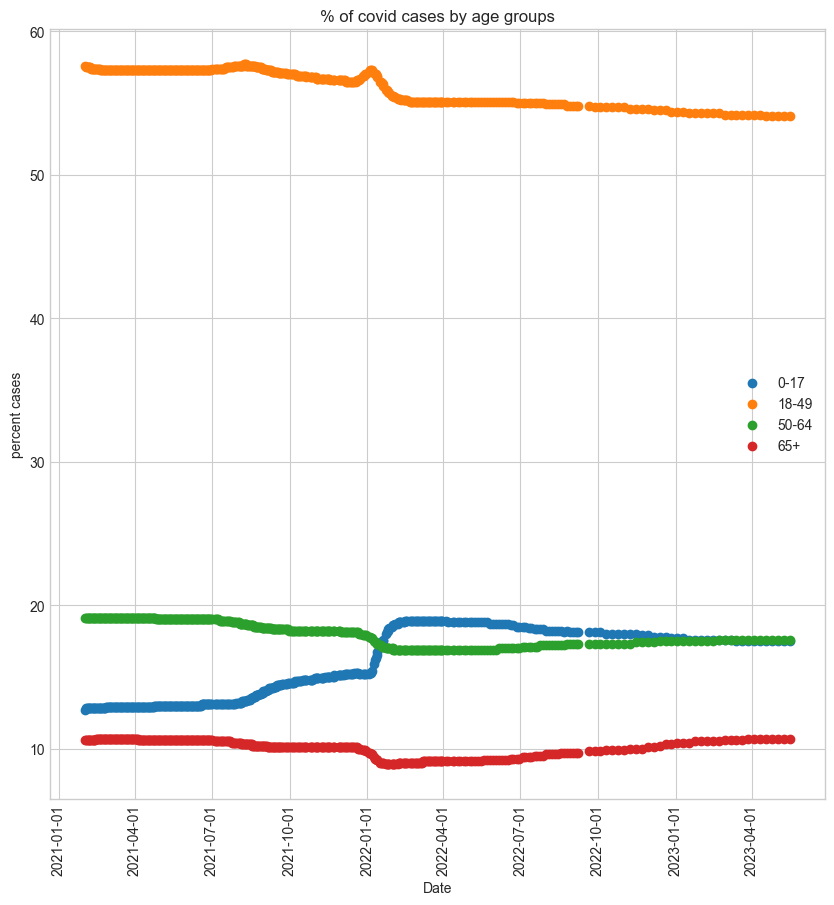

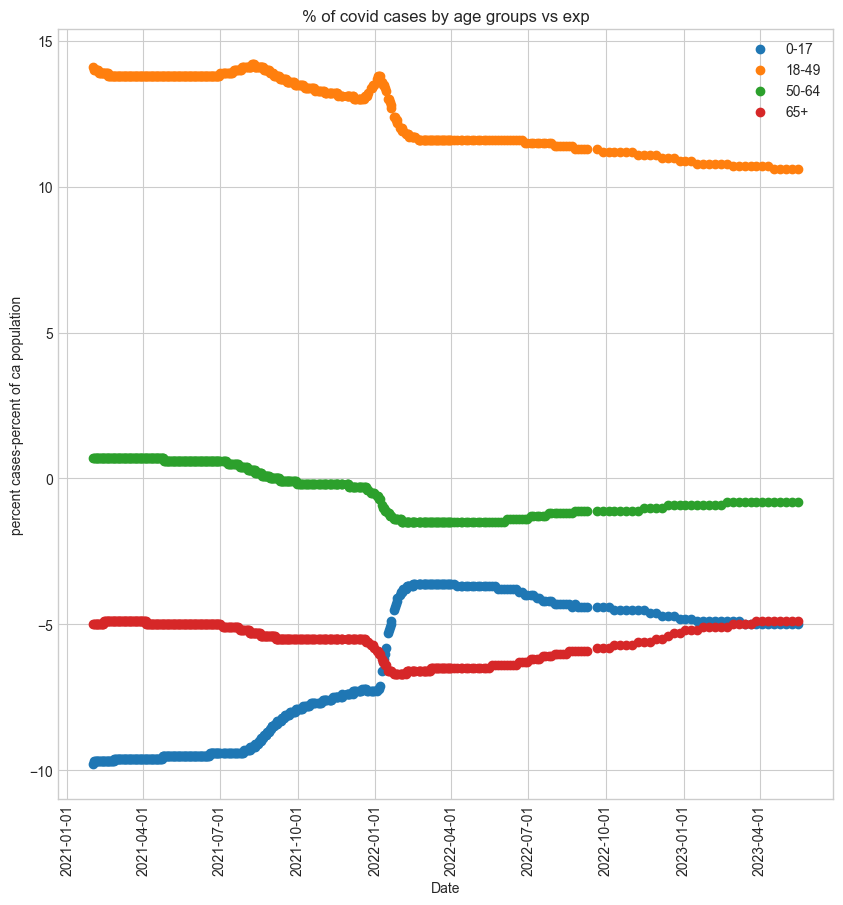

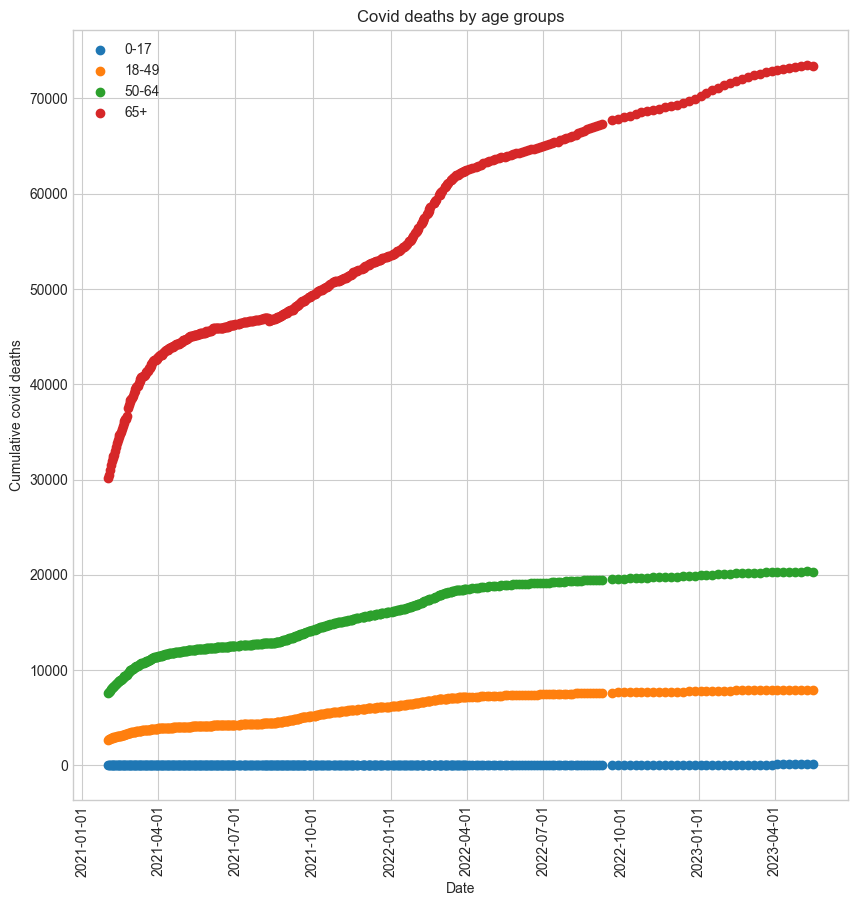

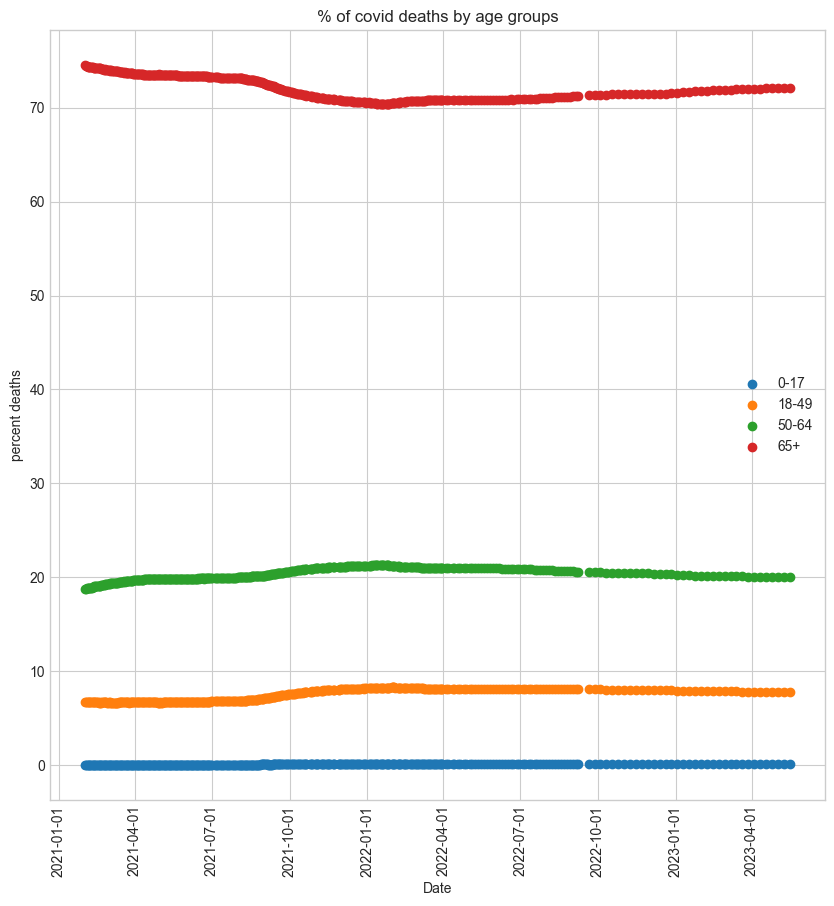

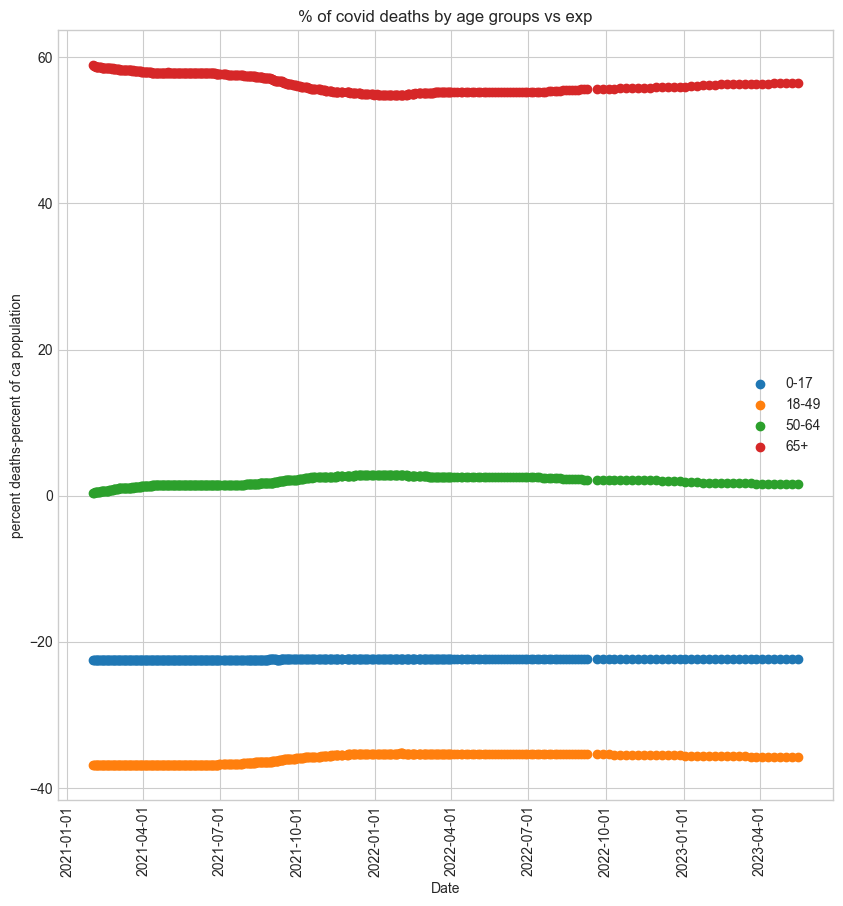

In [5]:
# ==============================================================================
# ANALYSIS 2: CASES AND DEATHS BY AGE
# ==============================================================================

age_outcomes_data = outcomes_df[outcomes_df["demographic_category"] == "Age Group"].reset_index(drop=True)[1710:]
age_outcomes_groups = {group: age_outcomes_data[age_outcomes_data["demographic_value"] == group] for group in age_outcomes_data['demographic_value'].unique()}
age_outcomes_labels = ["0-17", "18-49", "50-64", "65+"] # Hardcoded list to ensure no extra groups

# Replicating "vs expectation" calculations
pop_map_age = {'0-17': 22.5, '18-49': 43.5, '50-64': 18.4, '65+': 15.6}
cases_vs_exp_age, deaths_vs_exp_age = {}, {}
for group, pop_pct in pop_map_age.items():
    cases_vs_exp_age[group] = [val - pop_pct for val in age_outcomes_groups[group]["percent_cases"]]
    deaths_vs_exp_age[group] = [val - pop_pct for val in age_outcomes_groups[group]["percent_deaths"]]

# Replicating all 6 plots for age outcomes
plot_configs_age_outcomes = [
    ('total_cases', 'Covid cases by age groups', 'Cumulative covid cases'),
    ('percent_cases', '% of covid cases by age groups', 'percent cases'),
    ('cases_vs_exp', '% of covid cases by age groups vs exp', 'percent cases-percent of ca population'),
    ('deaths', 'Covid deaths by age groups', 'Cumulative covid deaths'),
    ('percent_deaths', '% of covid deaths by age groups', 'percent deaths'),
    ('deaths_vs_exp', '% of covid deaths by age groups vs exp', 'percent deaths-percent of ca population')
]
for y_col, title, ylabel in plot_configs_age_outcomes:
    fig, ax = plt.subplots(figsize=(10, 10)); ax.set_title(title); ax.set_xlabel("Date"); ax.set_ylabel(ylabel)
    for i, group in enumerate(age_outcomes_labels):
        data_source = age_outcomes_groups[group]
        y_values = cases_vs_exp_age[group] if y_col == 'cases_vs_exp' else (deaths_vs_exp_age[group] if y_col == 'deaths_vs_exp' else data_source[y_col])
        ax.scatter(data_source["report_date"], y_values, color=COLOR_PALETTE[i], label=group)
    ax.legend(); ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d")); plt.xticks(rotation=90); plt.show()

## Analysis 2: Race & Ethnicity-Based Disparities

This section investigates disparities across different racial and ethnic groups in California. The process mirrors the age analysis: first examining raw vaccination numbers, then normalizing by population share to compare rates directly. This is followed by an analysis of case and death data to determine if certain groups experienced disproportionately poor outcomes.

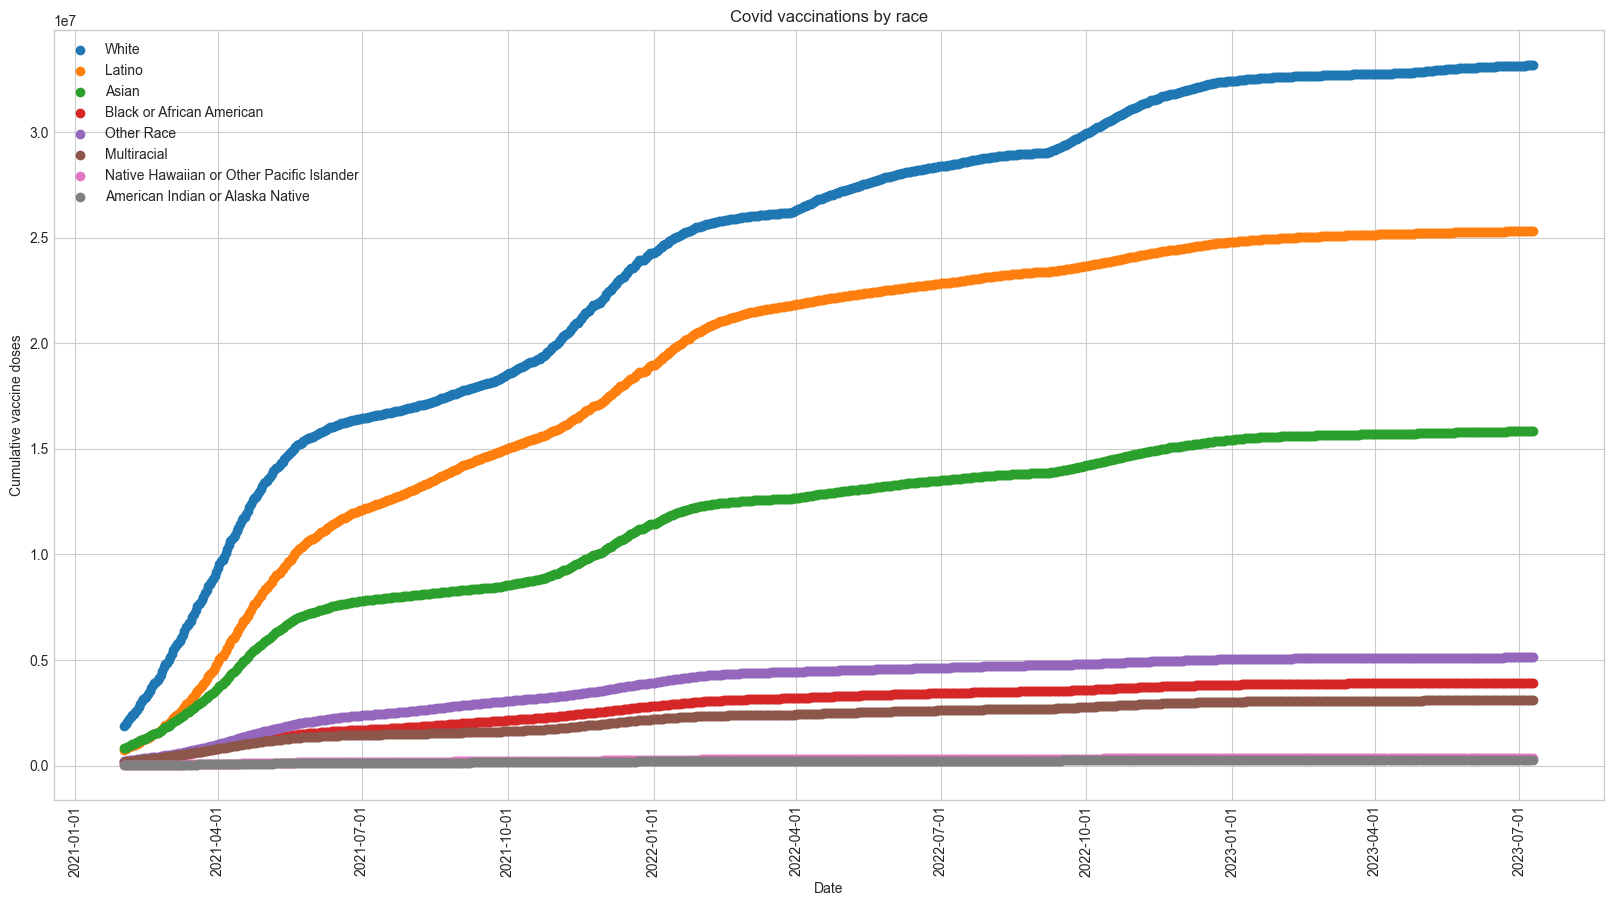

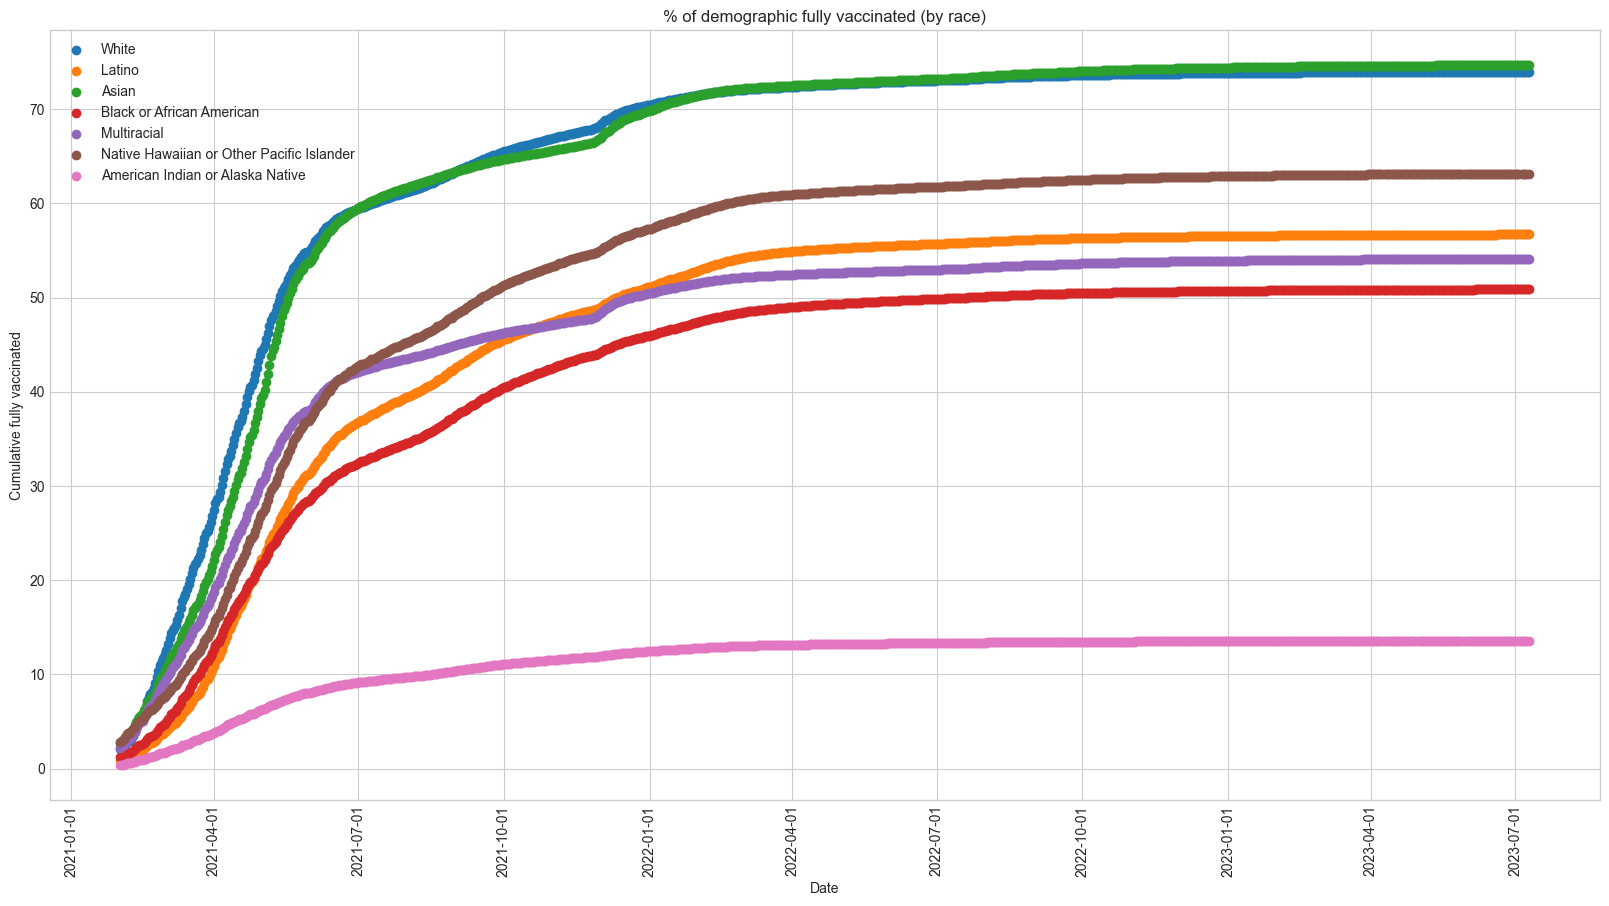

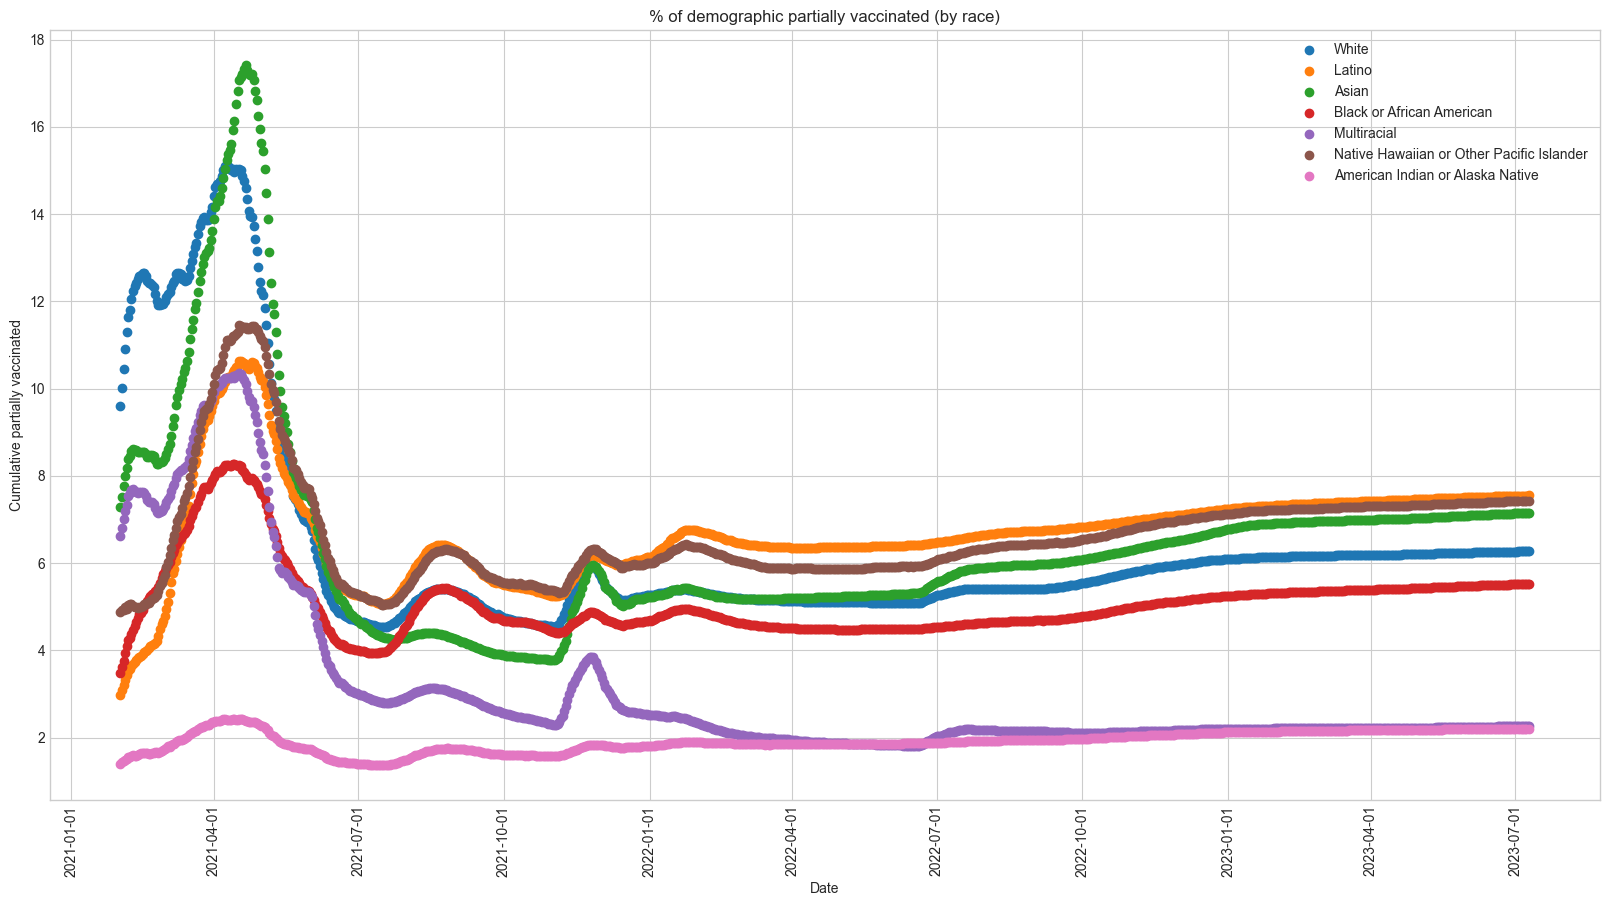

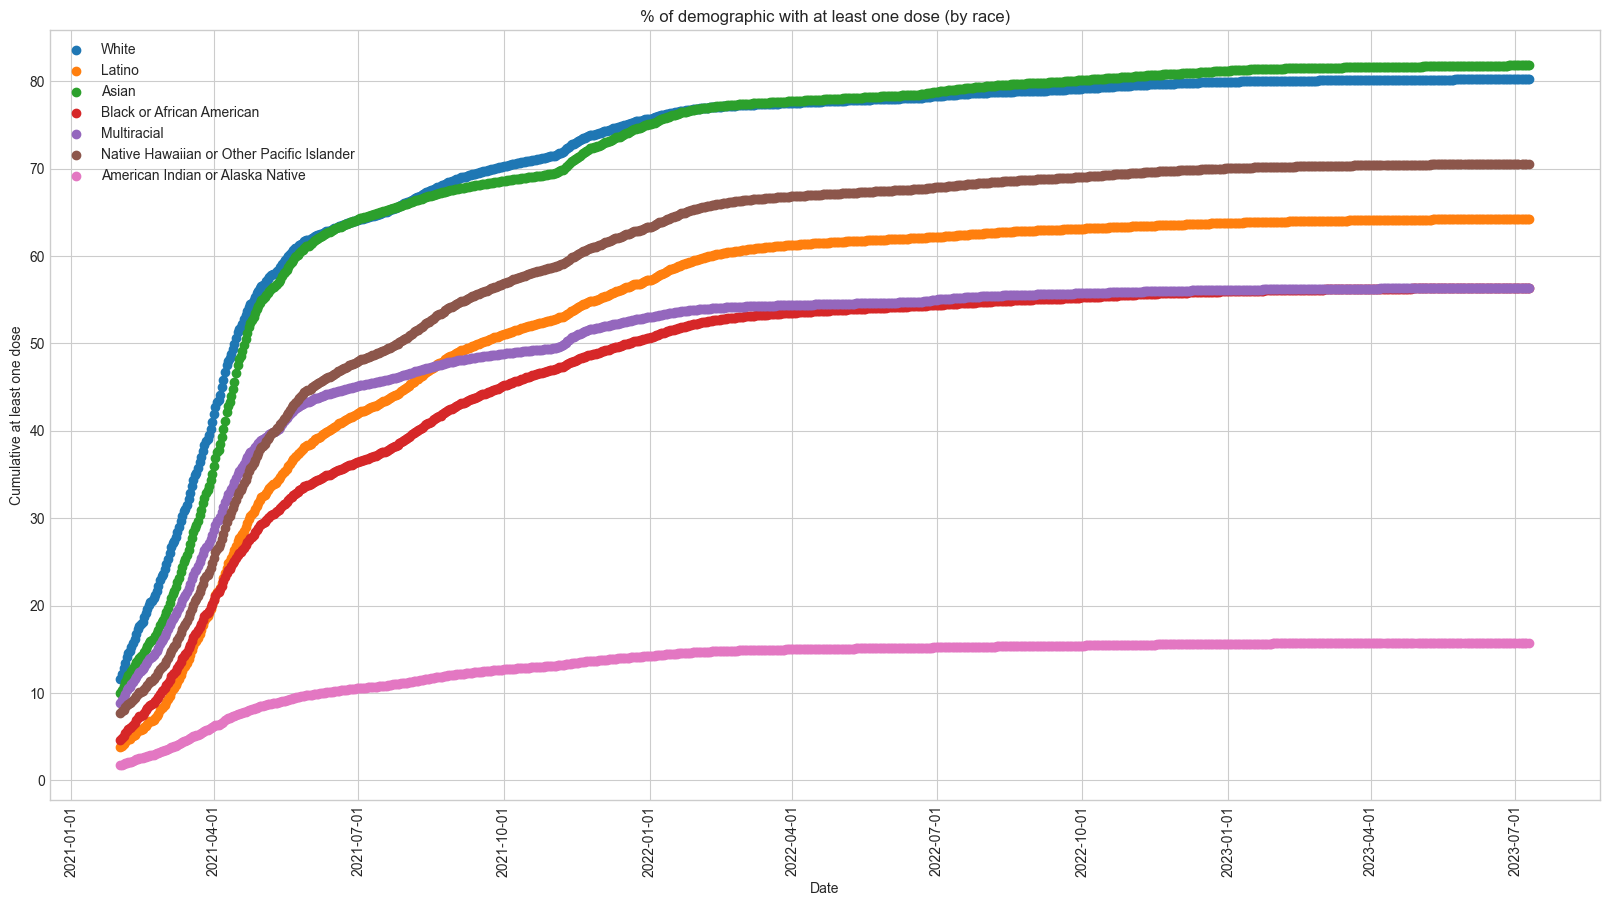

In [6]:
# ==============================================================================
# ANALYSIS 3: VACCINATIONS BY RACE/ETHNICITY
# ==============================================================================

race_vax_data = vaccine_df[vaccine_df["demographic_category"] == "Race/Ethnicity"].sort_values(by="administered_date", ascending=False)
race_vax_labels_all = ["White", "Latino", "Asian", "Black or African American", "Other Race", "Multiracial", "Native Hawaiian or Other Pacific Islander", "American Indian or Alaska Native"]
race_vax_groups = {label: race_vax_data[race_vax_data["demographic_value"] == label] for label in race_vax_labels_all}

# --- Plot 3.1: Cumulative Doses by Race ---
fig, ax = plt.subplots(figsize=(20, 10)); ax.set_title("Covid vaccinations by race"); ax.set_xlabel("Date"); ax.set_ylabel("Cumulative vaccine doses")
for i, label in enumerate(race_vax_labels_all):
    ax.scatter(race_vax_groups[label]["administered_date"], race_vax_groups[label]["cumulative_total_doses"], color=COLOR_PALETTE[i % len(COLOR_PALETTE)], label=label)
ax.legend(); ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d")); plt.xticks(rotation=90); plt.show()

# --- Manual Calculations for Normalized Race Plots ---
pop_map_race = {'White': 0.347, 'Latino': 0.403, 'Asian': 0.163, 'Black or African American': 0.065, 'Multiracial': 0.043, 'Native Hawaiian or Other Pacific Islander': 0.005, 'American Indian or Alaska Native': 0.017}
pct_fully_vax_race, pct_part_vax_race, pct_one_dose_race = {}, {}, {}
for label, pop_pct in pop_map_race.items():
    pct_fully_vax_race[label] = race_vax_groups[label]["cumulative_fully_vaccinated"] / (395382.23 * pop_pct)
    pct_part_vax_race[label] = race_vax_groups[label]["total_partially_vaccinated"] / (395382.23 * pop_pct)
    pct_one_dose_race[label] = race_vax_groups[label]["cumulative_at_least_one_dose"] / (395382.23 * pop_pct)

# --- Plots 3.2-3.4: Normalized Vax Stats by Race ---
race_norm_plots_config = [
    (pct_fully_vax_race, "% of demographic fully vaccinated (by race)", "Cumulative fully vaccinated"),
    (pct_part_vax_race, "% of demographic partially vaccinated (by race)", "Cumulative partially vaccinated"),
    (pct_one_dose_race, "% of demographic with at least one dose (by race)", "Cumulative at least one dose")
]
for data_dict, title, ylabel in race_norm_plots_config:
    fig, ax = plt.subplots(figsize=(20, 10)); ax.set_title(title); ax.set_xlabel("Date"); ax.set_ylabel(ylabel)
    # Note: original plots for normalized race data excluded "Other Race"
    for i, label in enumerate(pop_map_race.keys()):
        ax.scatter(race_vax_groups[label]["administered_date"], data_dict[label], color=COLOR_PALETTE[i % len(COLOR_PALETTE)], label=label)
    ax.legend(); ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d")); plt.xticks(rotation=90); plt.show()

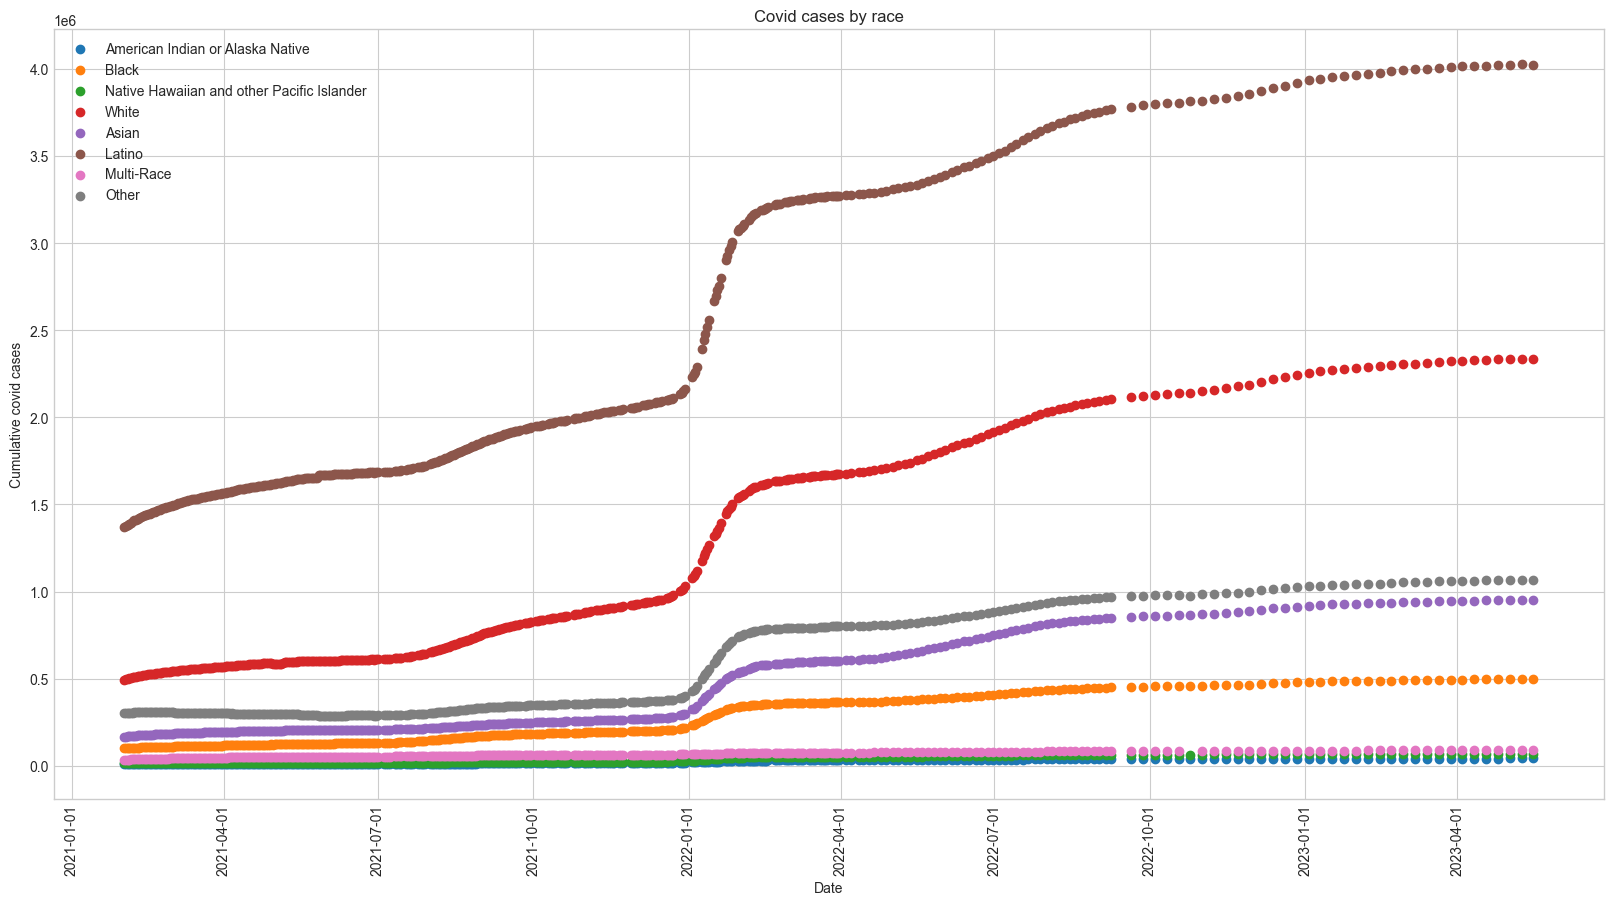

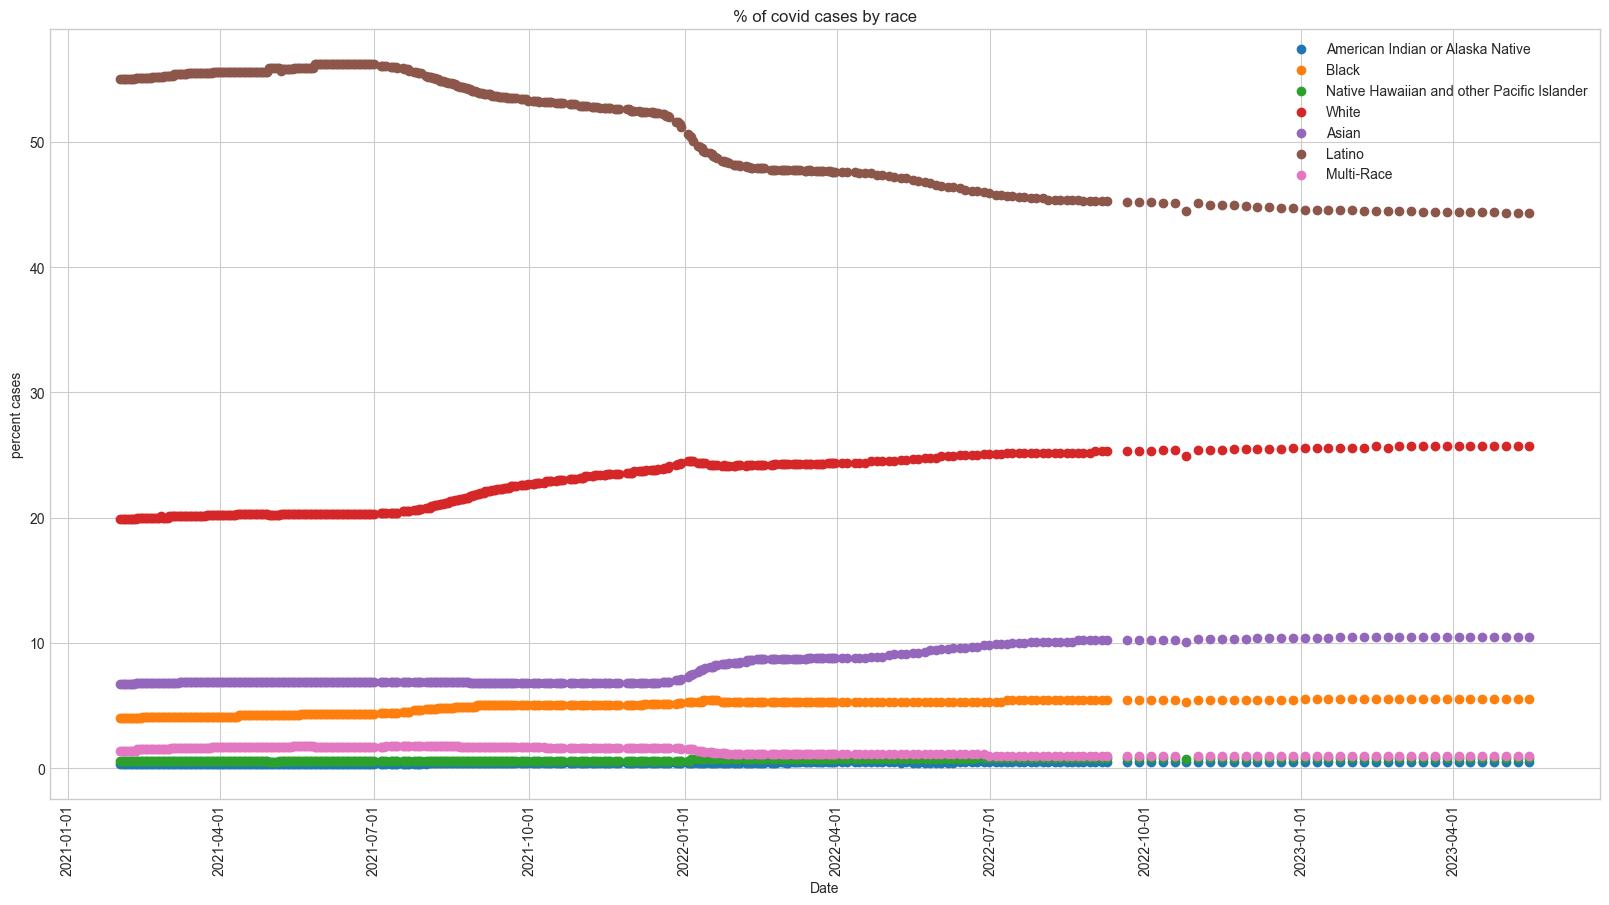

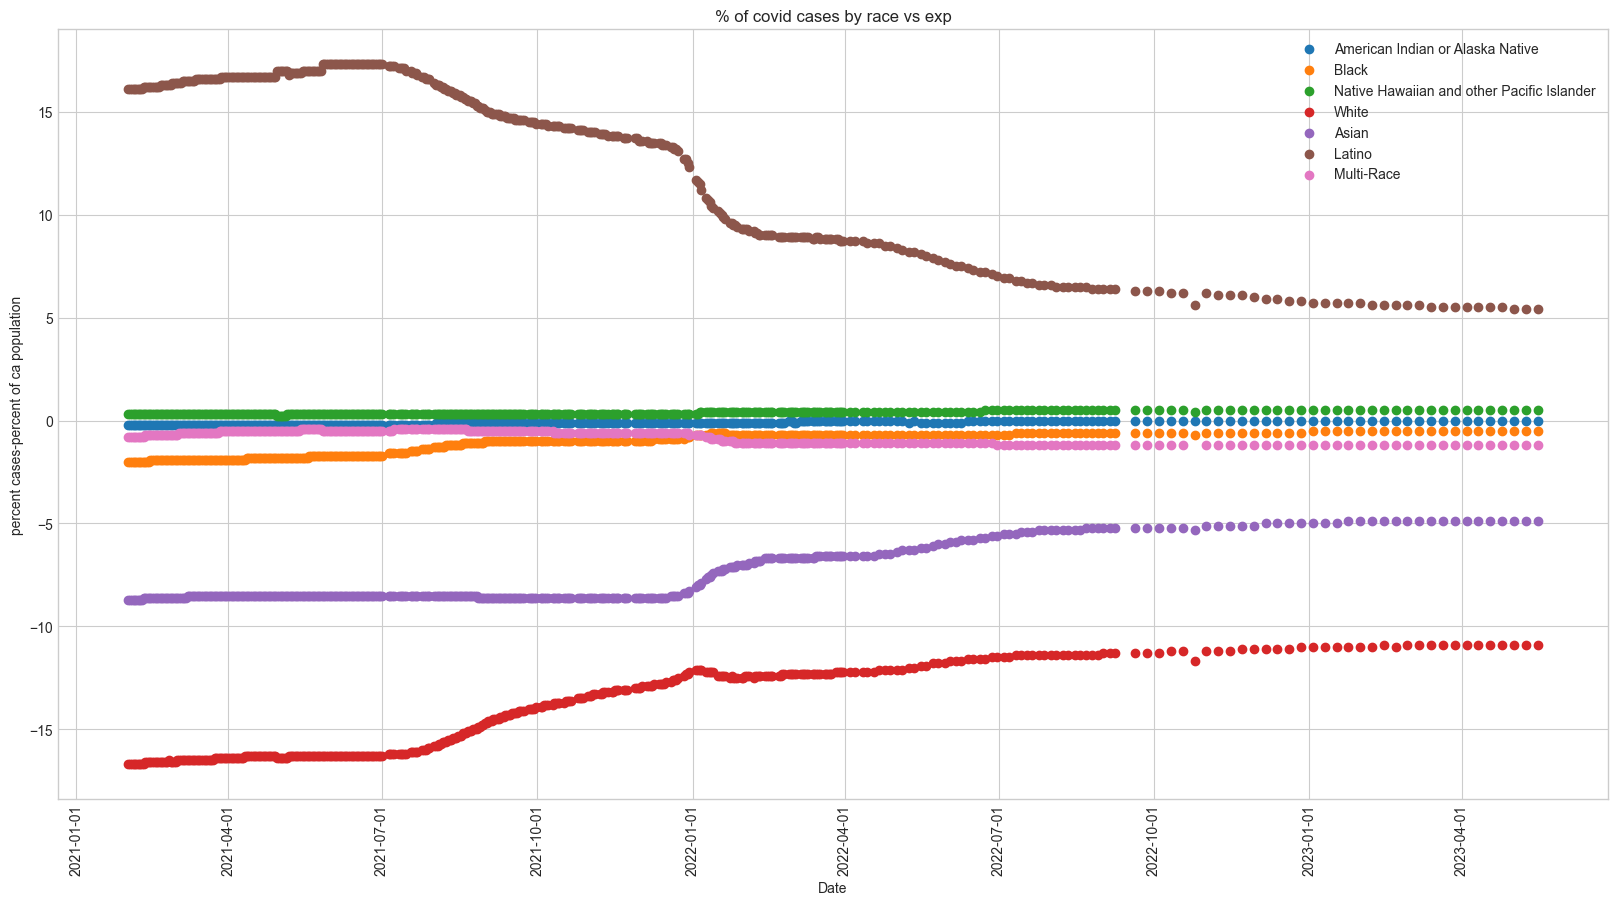

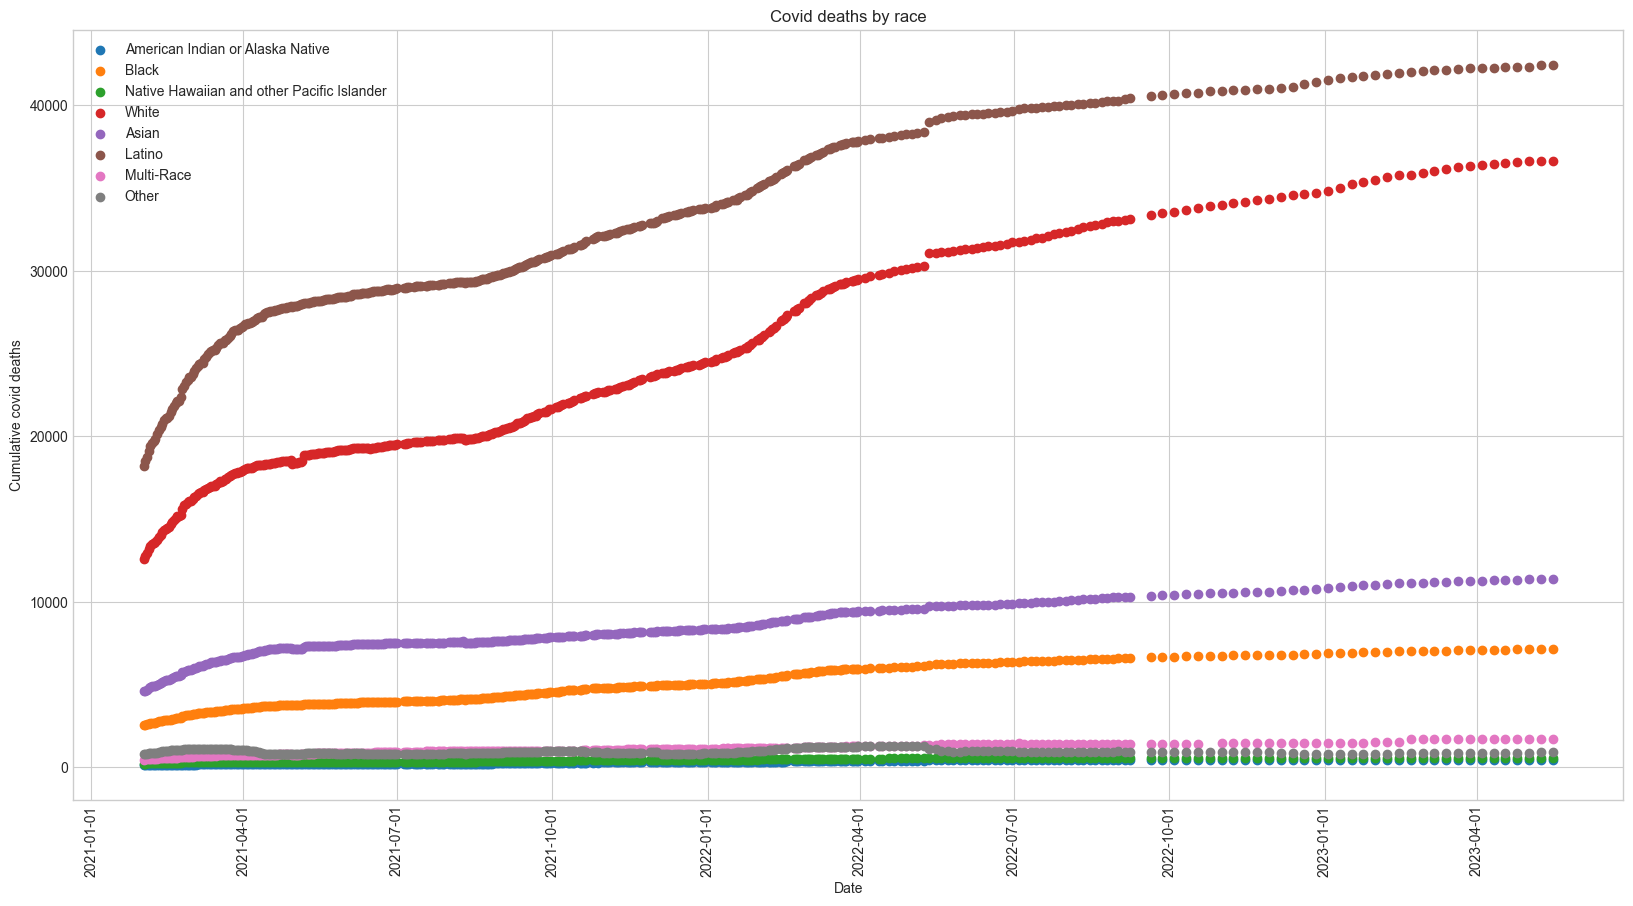

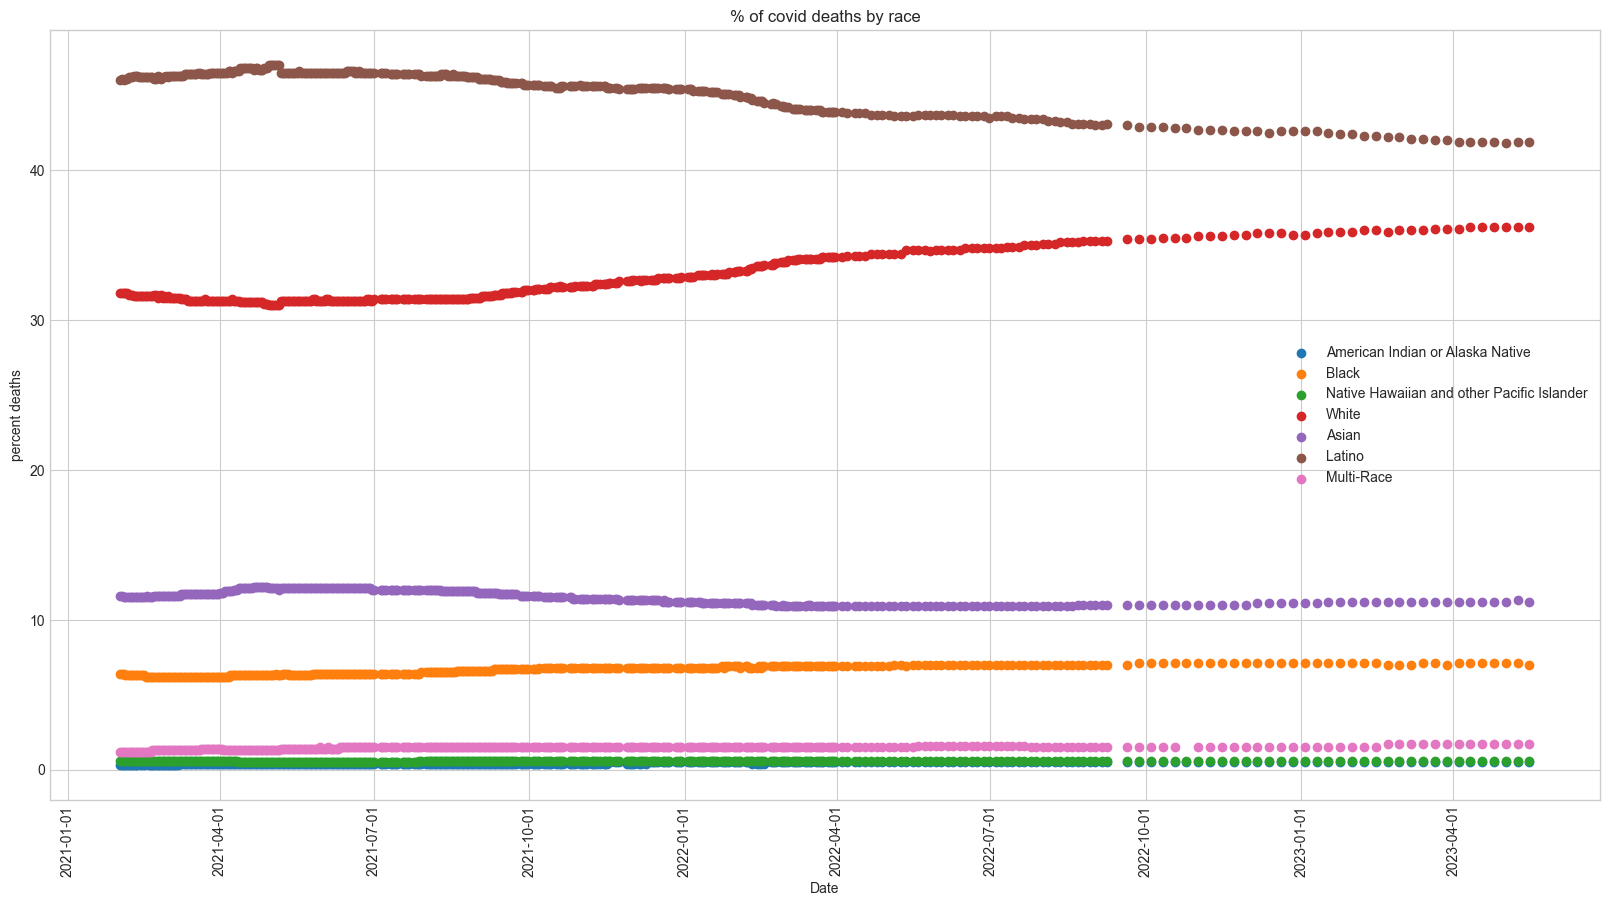

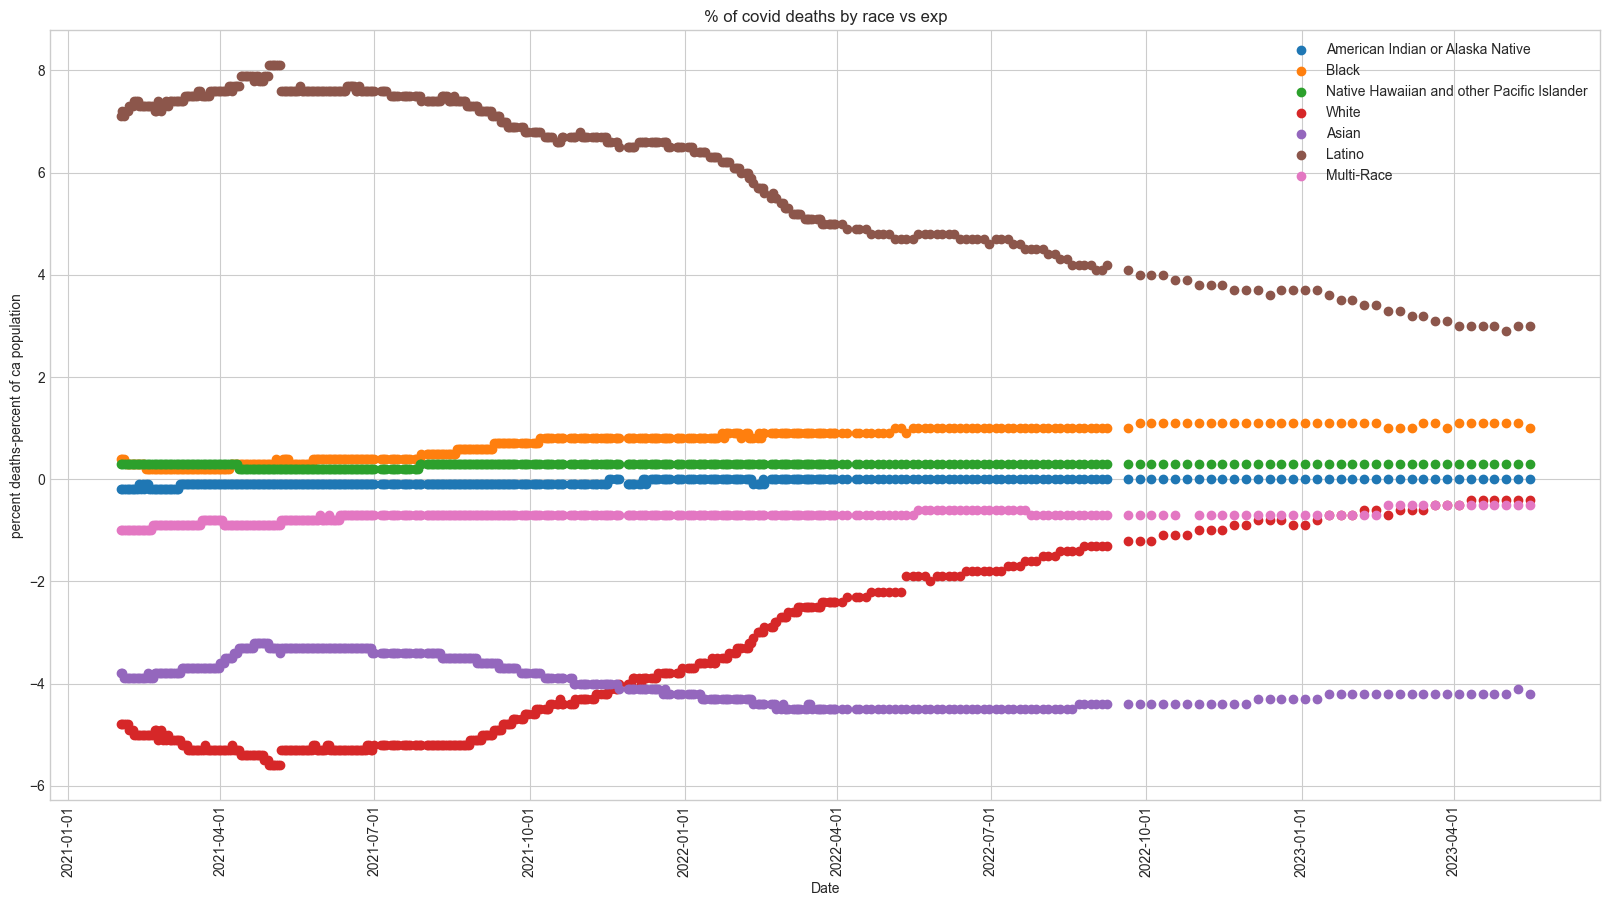

In [7]:
# ==============================================================================
# ANALYSIS 4: CASES AND DEATHS BY RACE/ETHNICITY
# ==============================================================================

race_outcomes_data = outcomes_df[outcomes_df["demographic_category"] == "Race Ethnicity"].reset_index(drop=True)[2646:]
race_outcomes_labels_all = ["American Indian or Alaska Native", "Black", "Native Hawaiian and other Pacific Islander", "White", "Asian", "Latino", "Multi-Race", "Other"]
race_outcomes_groups = {label: race_outcomes_data[race_outcomes_data["demographic_value"] == label] for label in race_outcomes_labels_all}
pop_map_race_outcomes = {'American Indian or Alaska Native': 0.5, 'Black': 6.0, 'Native Hawaiian and other Pacific Islander': 0.3, 'White': 36.6, 'Asian': 15.4, 'Latino': 38.9, 'Multi-Race': 2.2}

cases_vs_exp_race, deaths_vs_exp_race = {}, {}
for label, pop_pct in pop_map_race_outcomes.items():
    cases_vs_exp_race[label] = [val - pop_pct for val in race_outcomes_groups[label]["percent_cases"]]
    deaths_vs_exp_race[label] = [val - pop_pct for val in race_outcomes_groups[label]["percent_deaths"]]

# Replicating all 6 plots for race outcomes
plot_configs_race_outcomes = [
    ('total_cases', "Covid cases by race", "Cumulative covid cases", race_outcomes_labels_all),
    ('percent_cases', "% of covid cases by race", "percent cases", list(pop_map_race_outcomes.keys())),
    ('cases_vs_exp', "% of covid cases by race vs exp", "percent cases-percent of ca population", list(pop_map_race_outcomes.keys())),
    ('deaths', "Covid deaths by race", "Cumulative covid deaths", race_outcomes_labels_all),
    ('percent_deaths', "% of covid deaths by race", "percent deaths", list(pop_map_race_outcomes.keys())),
    ('deaths_vs_exp', "% of covid deaths by race vs exp", "percent deaths-percent of ca population", list(pop_map_race_outcomes.keys()))
]
for y_col, title, ylabel, labels_to_plot in plot_configs_race_outcomes:
    fig, ax = plt.subplots(figsize=(20, 10)); ax.set_title(title); ax.set_xlabel("Date"); ax.set_ylabel(ylabel)
    for i, label in enumerate(labels_to_plot):
        y_values = cases_vs_exp_race[label] if y_col == 'cases_vs_exp' else (deaths_vs_exp_race[label] if y_col == 'deaths_vs_exp' else race_outcomes_groups[label][y_col])
        ax.scatter(race_outcomes_groups[label]["report_date"], y_values, color=COLOR_PALETTE[i % len(COLOR_PALETTE)], label=label)
    ax.legend(); ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d")); plt.xticks(rotation=90); plt.show()


## Analysis 3: Gender-Based Disparities

The final section of the analysis examines trends between genders. I analyze vaccination, case, and death data to identify any significant differences in public health outcomes between males and females.

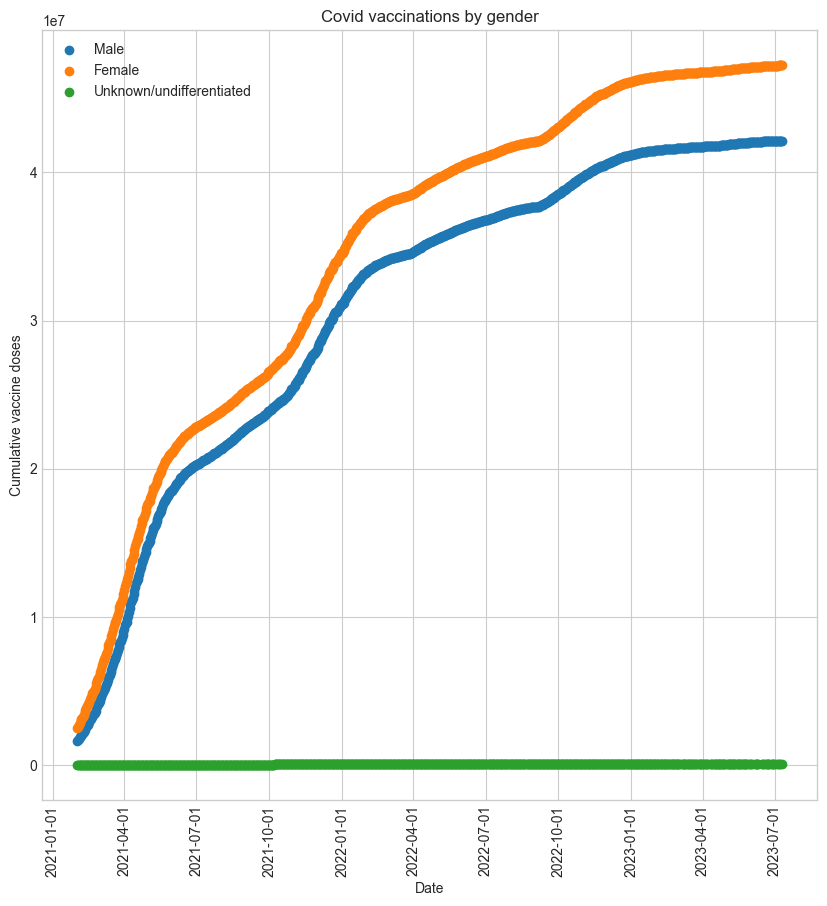

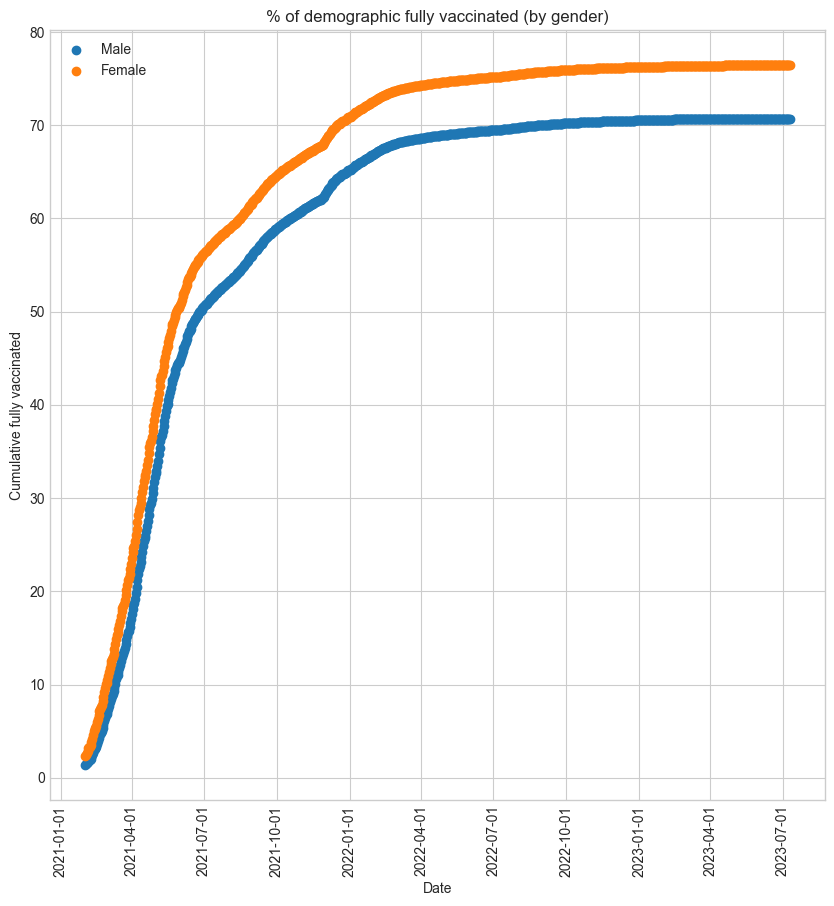

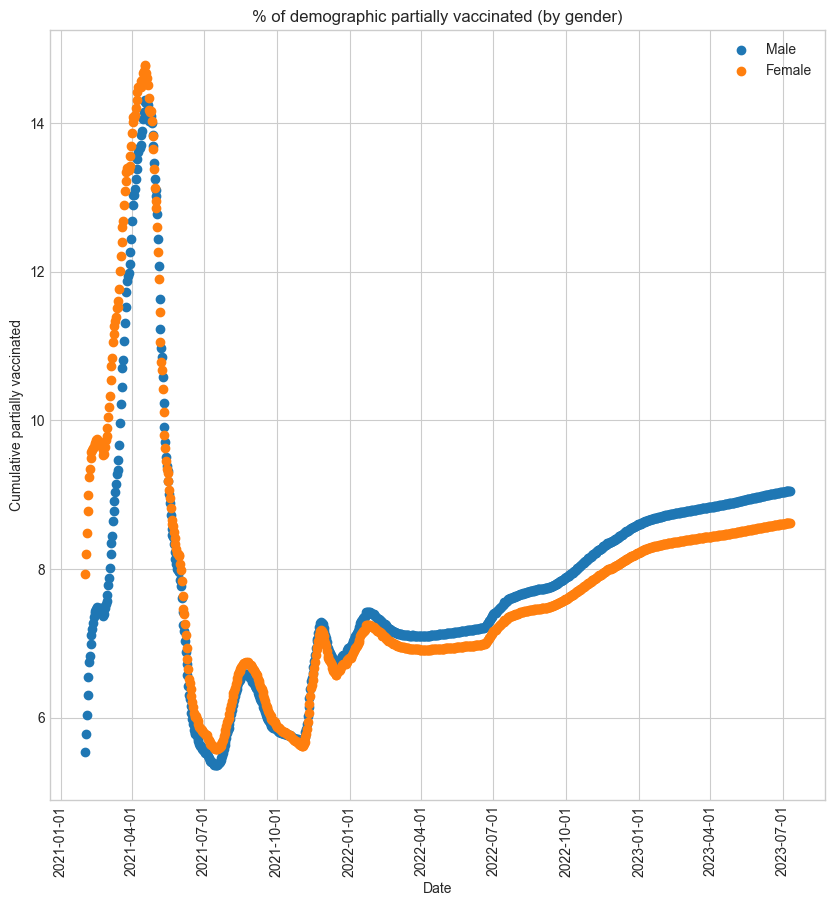

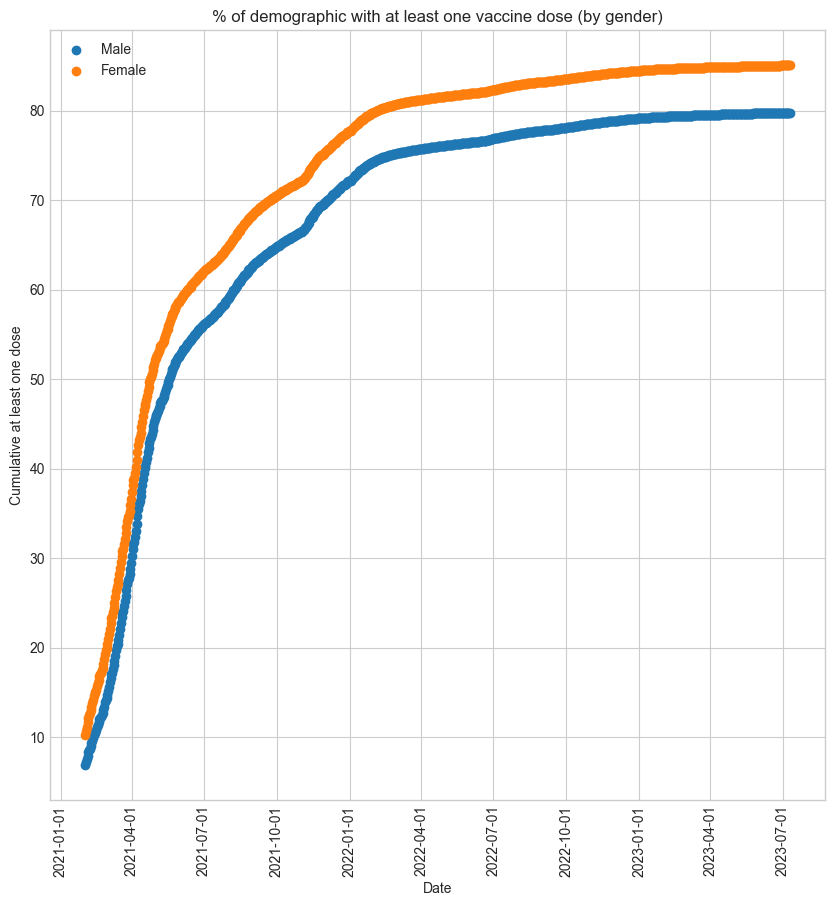

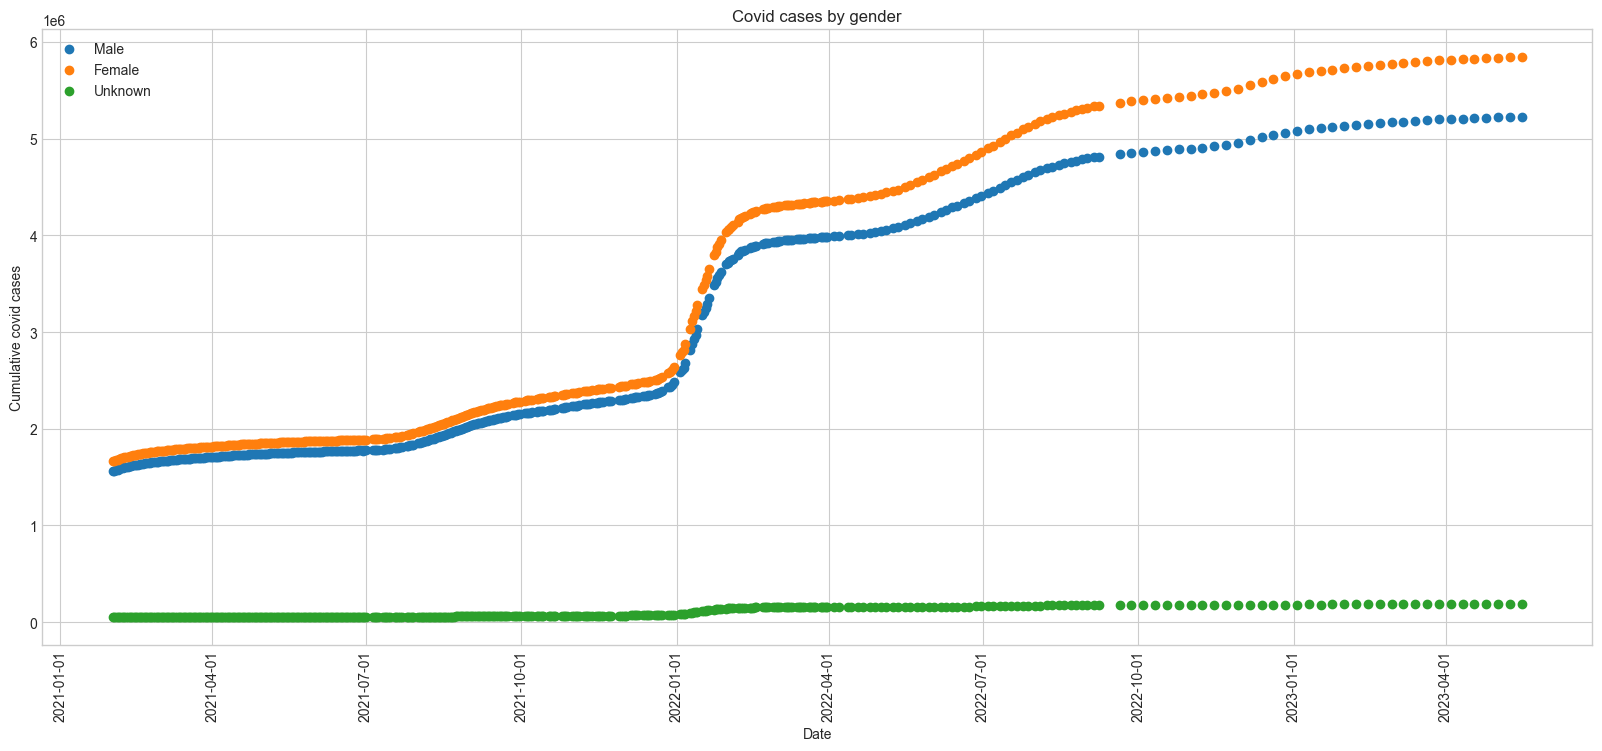

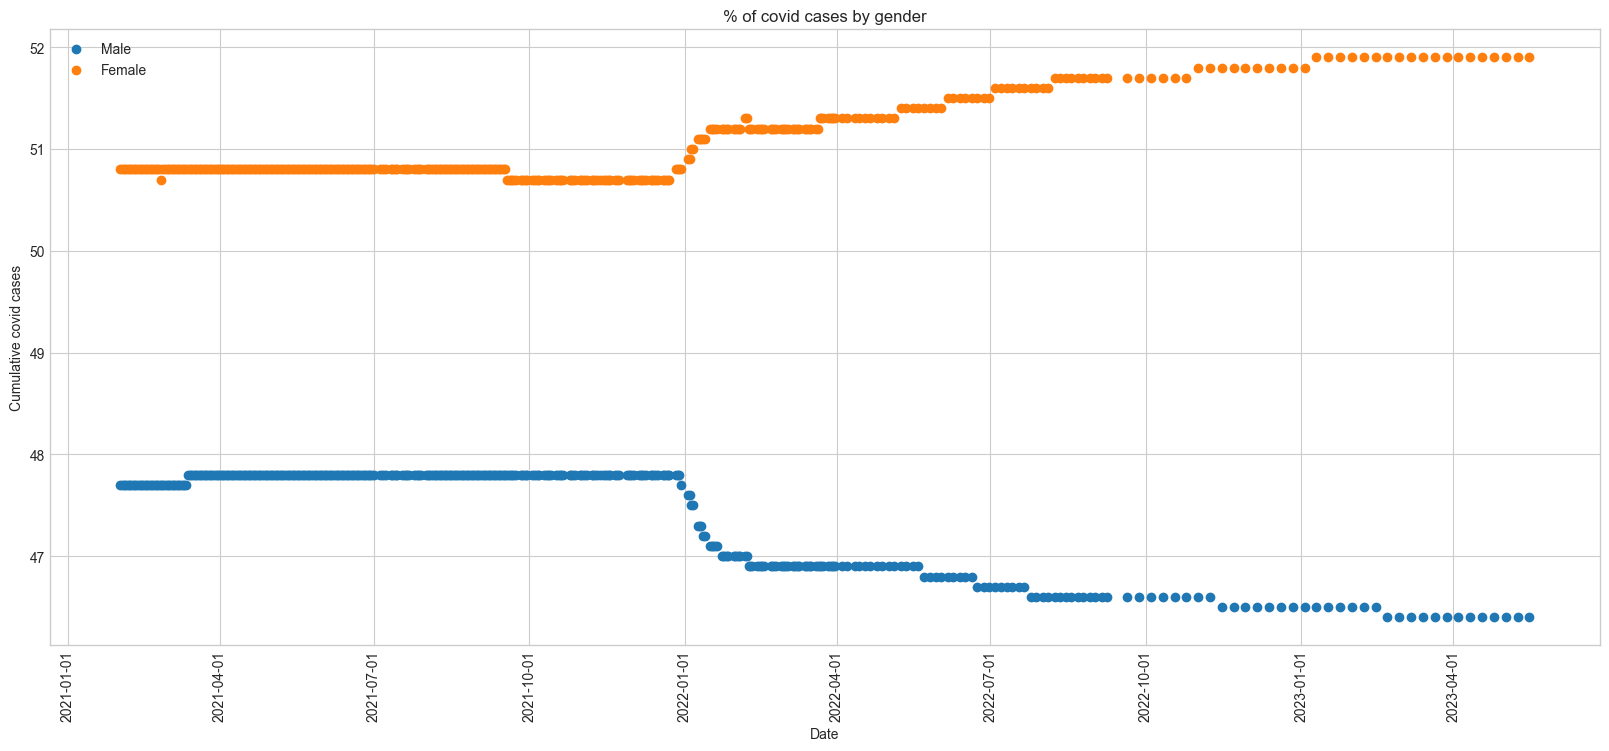

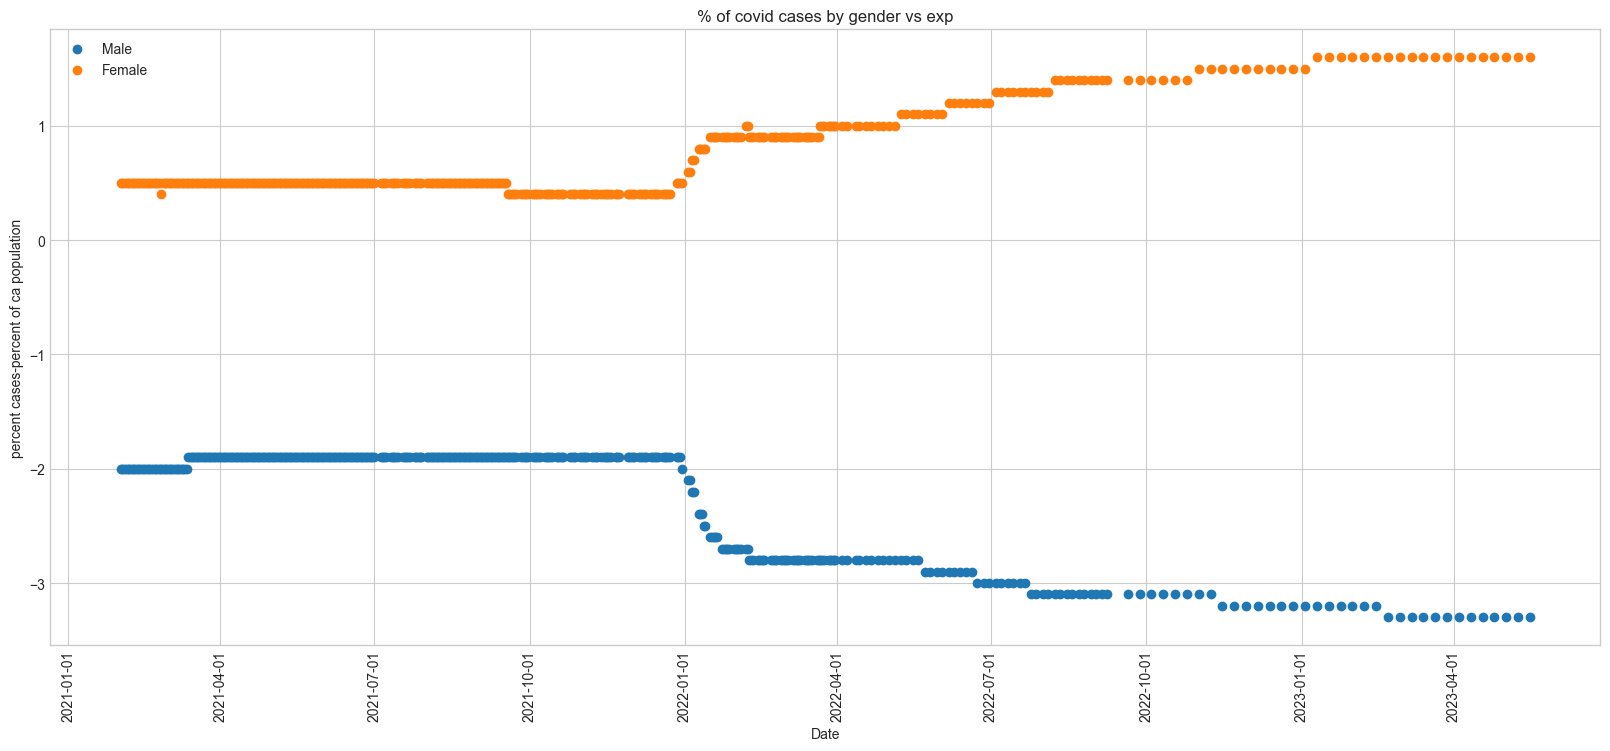

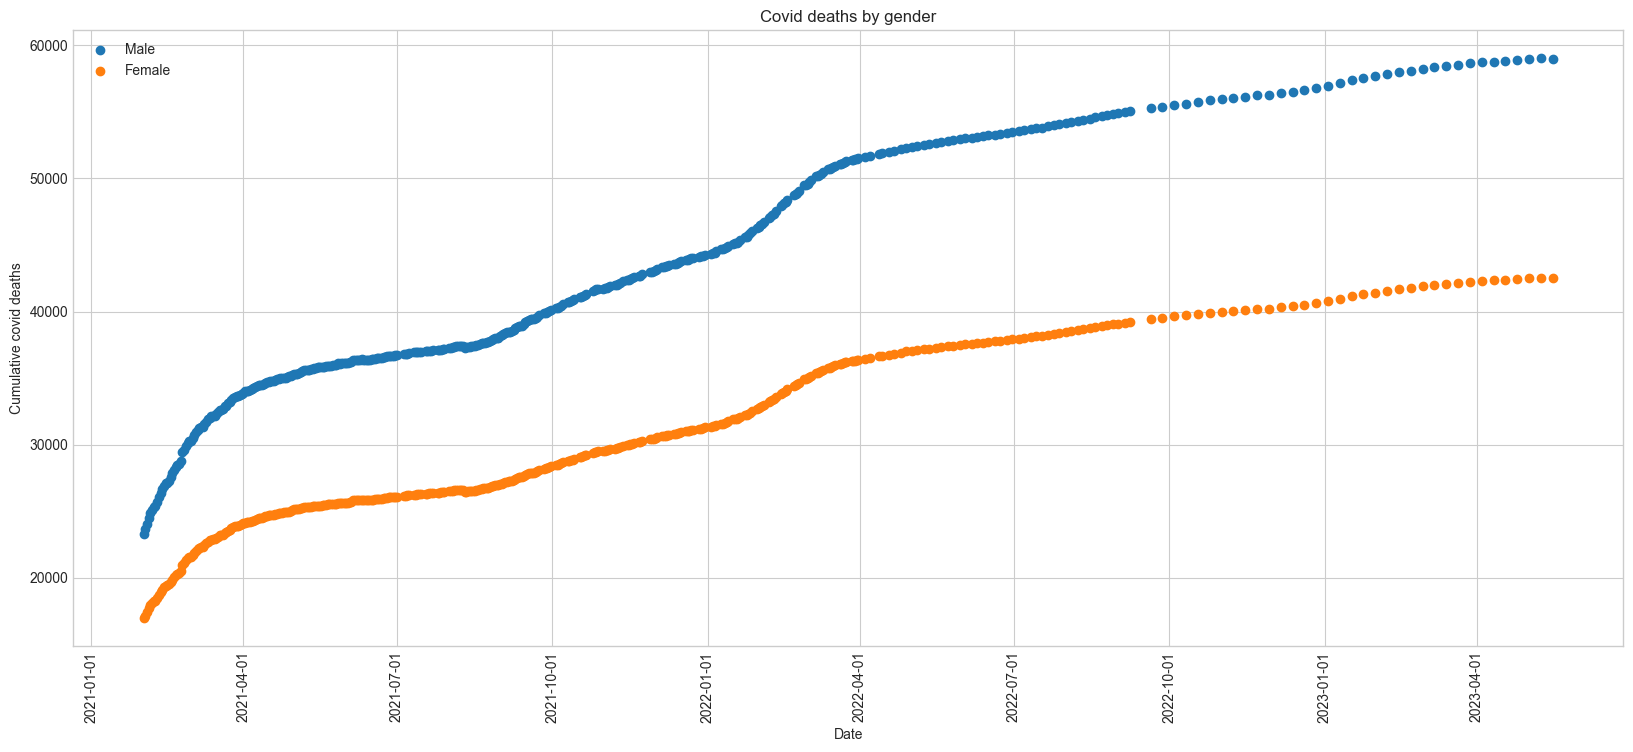

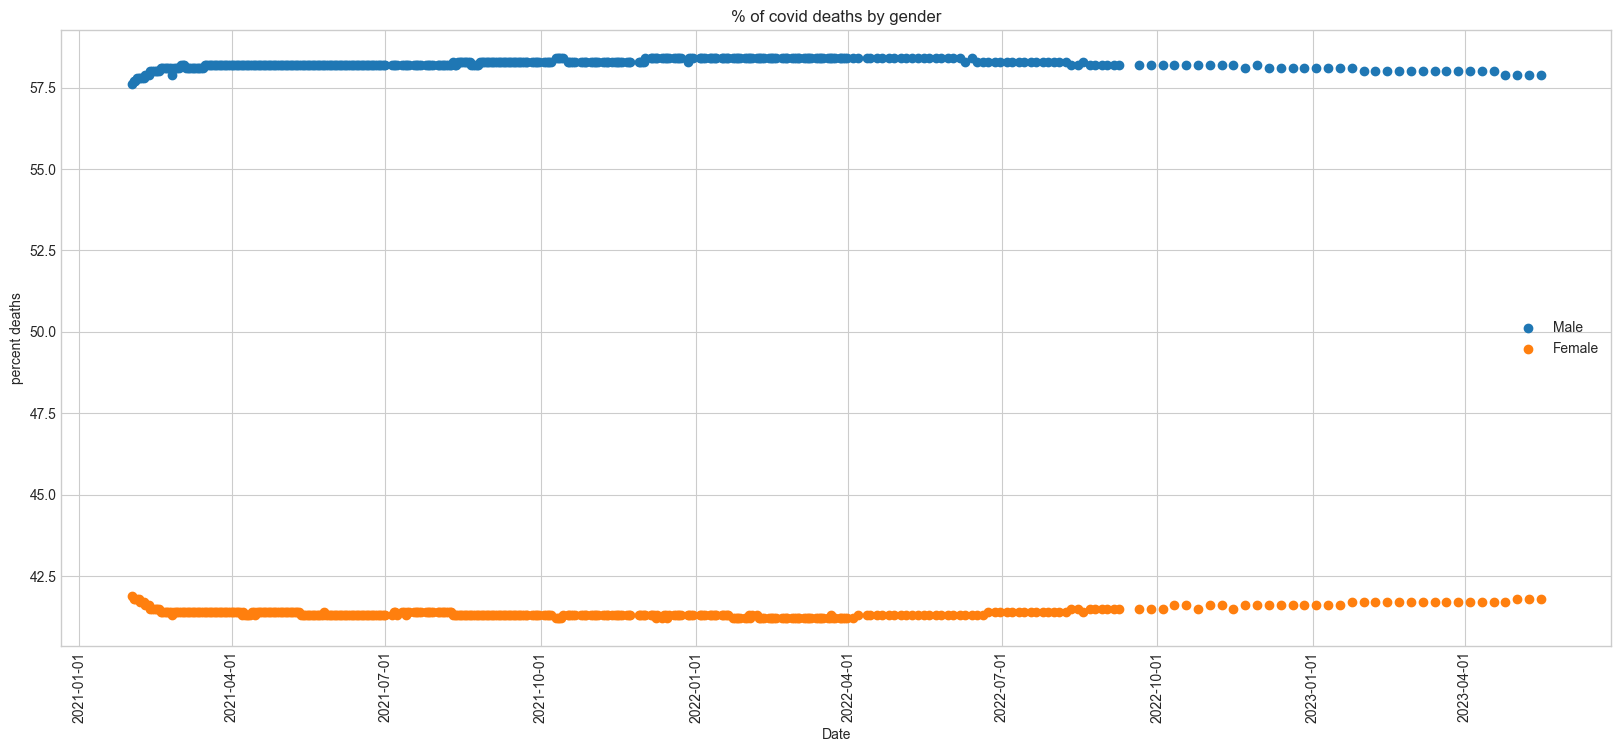

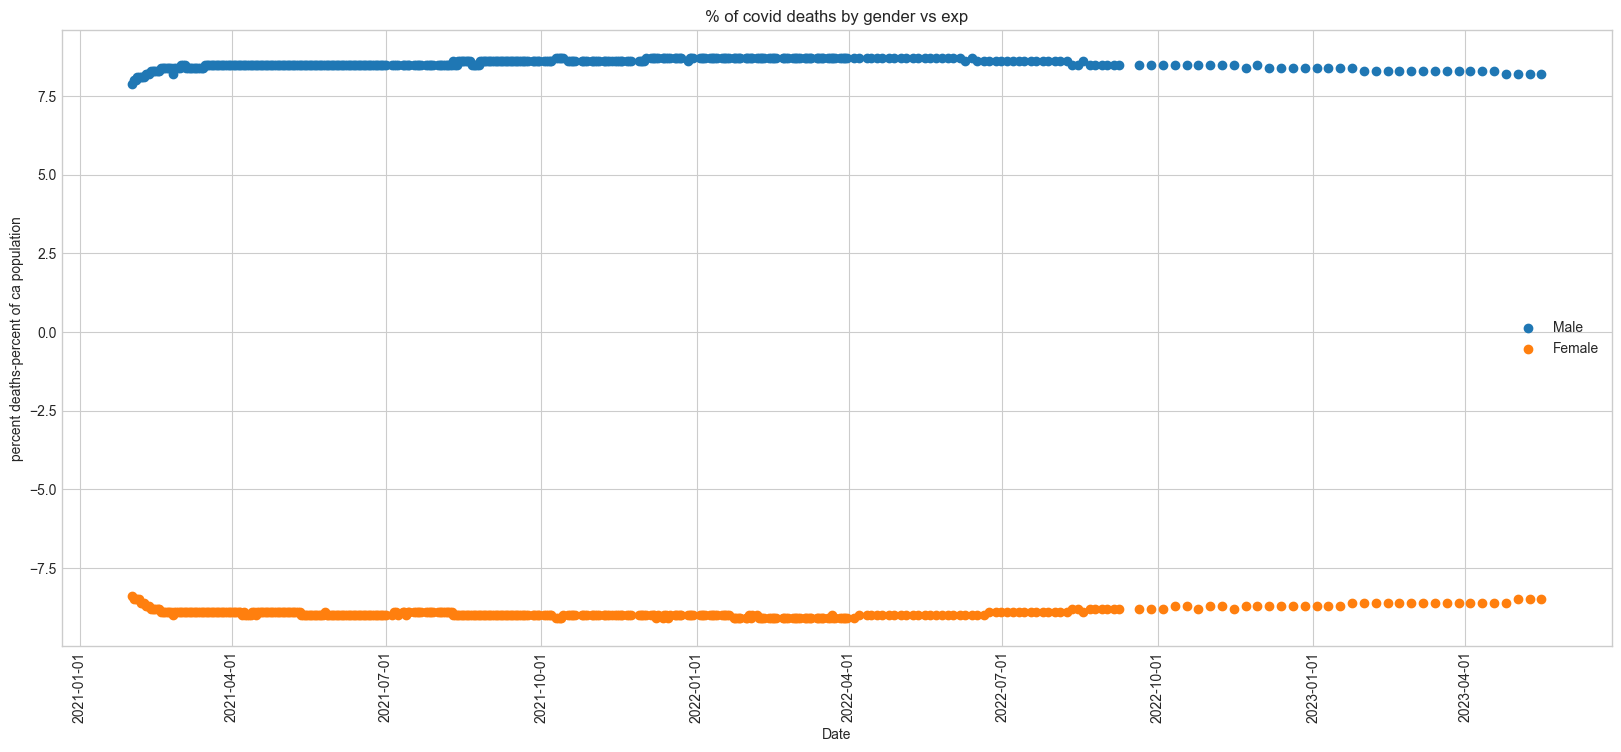

In [8]:
# ==============================================================================
# ANALYSIS 5 & 6: GENDER DATA
# ==============================================================================

gender_vax_data = vaccine_df[vaccine_df["demographic_category"] == "Gender"].sort_values(by="administered_date", ascending=False)
male_vax_df, female_vax_df, unknown_vax_df = gender_vax_data[gender_vax_data["demographic_value"] == "Male"], gender_vax_data[gender_vax_data["demographic_value"] == "Female"], gender_vax_data[gender_vax_data["demographic_value"] == "Unknown/undifferentiated"]

gender_outcomes_data = outcomes_df[outcomes_df["demographic_category"] == "Gender"].reset_index(drop=True)[1140:]
male_outcomes_df, female_outcomes_df, unknown_outcomes_df = gender_outcomes_data[gender_outcomes_data["demographic_value"] == "Male"], gender_outcomes_data[gender_outcomes_data["demographic_value"] == "Female"], gender_outcomes_data[gender_outcomes_data["demographic_value"] == "Unknown"]

# Vax plots
fig, ax = plt.subplots(figsize=(10, 10)); ax.set_title("Covid vaccinations by gender"); ax.set_xlabel("Date"); ax.set_ylabel("Cumulative vaccine doses")
ax.scatter(male_vax_df["administered_date"], male_vax_df["cumulative_total_doses"], color=COLOR_PALETTE[0], label="Male")
ax.scatter(female_vax_df["administered_date"], female_vax_df["cumulative_total_doses"], color=COLOR_PALETTE[1], label="Female")
ax.scatter(unknown_vax_df["administered_date"], unknown_vax_df["cumulative_total_doses"], color=COLOR_PALETTE[2], label="Unknown/undifferentiated")
ax.legend(); ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d")); plt.xticks(rotation=90); plt.show()

fig, ax = plt.subplots(figsize=(10, 10)); ax.set_title("% of demographic fully vaccinated (by gender)"); ax.set_xlabel("Date"); ax.set_ylabel("Cumulative fully vaccinated")
ax.scatter(male_vax_df["administered_date"], male_vax_df["cumulative_fully_vaccinated"] / (395382.23 * 0.499), color=COLOR_PALETTE[0], label="Male")
ax.scatter(female_vax_df["administered_date"], female_vax_df["cumulative_fully_vaccinated"] / (395382.23 * 0.501), color=COLOR_PALETTE[1], label="Female")
ax.legend(); ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d")); plt.xticks(rotation=90); plt.show()

fig, ax = plt.subplots(figsize=(10, 10)); ax.set_title("% of demographic partially vaccinated (by gender)"); ax.set_xlabel("Date"); ax.set_ylabel("Cumulative partially vaccinated")
ax.scatter(male_vax_df["administered_date"], male_vax_df["total_partially_vaccinated"] / (395382.23 * 0.499), color=COLOR_PALETTE[0], label="Male")
ax.scatter(female_vax_df["administered_date"], female_vax_df["total_partially_vaccinated"] / (395382.23 * 0.501), color=COLOR_PALETTE[1], label="Female")
ax.legend(); ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d")); plt.xticks(rotation=90); plt.show()

fig, ax = plt.subplots(figsize=(10, 10)); ax.set_title("% of demographic with at least one vaccine dose (by gender)"); ax.set_xlabel("Date"); ax.set_ylabel("Cumulative at least one dose")
ax.scatter(male_vax_df["administered_date"], male_vax_df["cumulative_at_least_one_dose"] / (395382.23 * 0.499), color=COLOR_PALETTE[0], label="Male")
ax.scatter(female_vax_df["administered_date"], female_vax_df["cumulative_at_least_one_dose"] / (395382.23 * 0.501), color=COLOR_PALETTE[1], label="Female")
ax.legend(); ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d")); plt.xticks(rotation=90); plt.show()

# Outcomes plots
pop_map_gender = {'Male': 49.7, 'Female': 50.3}
cases_vs_exp_gender, deaths_vs_exp_gender = {}, {}
for group, pop_pct in pop_map_gender.items():
    cases_vs_exp_gender[group] = [val - pop_pct for val in gender_outcomes_data[gender_outcomes_data['demographic_value'] == group]["percent_cases"]]
    deaths_vs_exp_gender[group] = [val - pop_pct for val in gender_outcomes_data[gender_outcomes_data['demographic_value'] == group]["percent_deaths"]]

plot_configs_gender_outcomes = [
    ('total_cases', "Covid cases by gender", "Cumulative covid cases", ["Male", "Female", "Unknown"]),
    ('percent_cases', "% of covid cases by gender", "Cumulative covid cases", ["Male", "Female"]),
    ('cases_vs_exp', "% of covid cases by gender vs exp", "percent cases-percent of ca population", ["Male", "Female"]),
    ('deaths', "Covid deaths by gender", "Cumulative covid deaths", ["Male", "Female"]),
    ('percent_deaths', "% of covid deaths by gender", "percent deaths", ["Male", "Female"]),
    ('deaths_vs_exp', "% of covid deaths by gender vs exp", "percent deaths-percent of ca population", ["Male", "Female"])
]
for y_col, title, ylabel, groups_to_plot in plot_configs_gender_outcomes:
    fig, ax = plt.subplots(figsize=(20, 8)); ax.set_title(title); ax.set_xlabel("Date"); ax.set_ylabel(ylabel)
    for i, group in enumerate(groups_to_plot):
        data_source = gender_outcomes_data[gender_outcomes_data['demographic_value'] == group]
        y_values = cases_vs_exp_gender[group] if y_col == 'cases_vs_exp' else (deaths_vs_exp_gender[group] if y_col == 'deaths_vs_exp' else data_source[y_col])
        ax.scatter(data_source["report_date"], y_values, color=COLOR_PALETTE[i % len(COLOR_PALETTE)], label=group)
    ax.legend(); ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d")); plt.xticks(rotation=90); plt.show()

## Conclusion

The analysis reveals clear demographic disparities in California's COVID-19 outcomes. Key findings include significantly lower vaccination rates among minority communities and a strong correlation between advanced age and mortality risk. These results highlight the importance of targeted public health interventions.

The complete findings and methodology are detailed in the published paper, available at: [https://doi.org/10.58445/rars.670](https://doi.org/10.58445/rars.670)